In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('BasedOnYearJournal.csv')
#Boşlukluları sildk
df = df[pd.notnull(df['Content'])]

In [3]:
df.shape

(327, 6)

In [4]:
#remove white space
df['Title'] = df['Title'].str.strip()

In [5]:
#Title 
df['TitleYear'] = df['Title']+df['Year'].astype(str)

In [6]:

df.index = range(327)
df['Content'].apply(lambda x: len(x.split(' '))).sum()
#df['Count'] = df['Content'].apply(lambda x: len(x.split(' '))
df['Count'] = df['Content'].str.count(' ') + 1

In [8]:
#top 10 to sort data 
dt=df.sort_values(by=['Count'], ascending=False).head(15)

In [9]:
dt.head(10)

Title  \
93               IEEE Robotics and Automation Letters   
94               IEEE Robotics and Automation Letters   
95               IEEE Robotics and Automation Letters   
56  IEEE Transactions on Neural Networks and Learn...   
54  IEEE Transactions on Neural Networks and Learn...   
33  Computer Networksalso: Computer Networks and I...   
6              Education and Information Technologies   
34  Computer Networksalso: Computer Networks and I...   
35  Computer Networksalso: Computer Networks and I...   
38                                       IEEE Network   

                                              Content  Year  ImpactFactor  \
93   { IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...  2020          0.99   
94   { IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...  2019          0.99   
95   { IEEE ROBOTİCS AND AUTOMATİON LETTERS } http...  2018          0.99   
56   { IEEE TRANSACTİONS ON NEURAL NETWORKS AND LE...  2018         16.17   
54   { IEEE TRANSACTİONS ON NEURAL NETWORKS AND LE...  2020         16.17   
33    { COMPUTER NETWORKSALSO: COMPUTER NETWORKS A...  2020          7.26   
6    { EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...  2020          1.65   
34   { COMPUTER NETWORKSALSO: COMPUTER NETWORKS AN...  2019          7.26   
35   { COMPUTER NETWORKSALSO: COMPUTER NETWORKS AN...  2018          7.26   
38  { IEEE NETWORK } https://dblp.uni-trier.de/db/...  2018         10.39   

    AcceptanceRate  Reviewtime  \
93             0.2           8   
94             0.2           8   
95             0.2           8   
56             0.2           8   
54             0.2           8   
33             0.2           8   
6              0.2           8   
34             0.2           8   
35             0.2           8   
38             0.2           8   

                                            TitleYear  Count  
93           IEEE Robotics and Automation Letters2020  33598  
94           IEEE Robotics and Automation Letters2019  22421  
95           IEEE Robotics and Automation Letters2018  20510  
56  IEEE Transactions on Neural Networks and Learn...  17000  
54  IEEE Transactions on Neural Networks and Learn...  14877  
33  Computer Networksalso: Computer Networks and I...  14009  
6          Education and Information Technologies2020  11174  
34  Computer Networksalso: Computer Networks and I...  11041  
35  Computer Networksalso: Computer Networks and I...  10763  
38                                   IEEE Network2018  10452

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


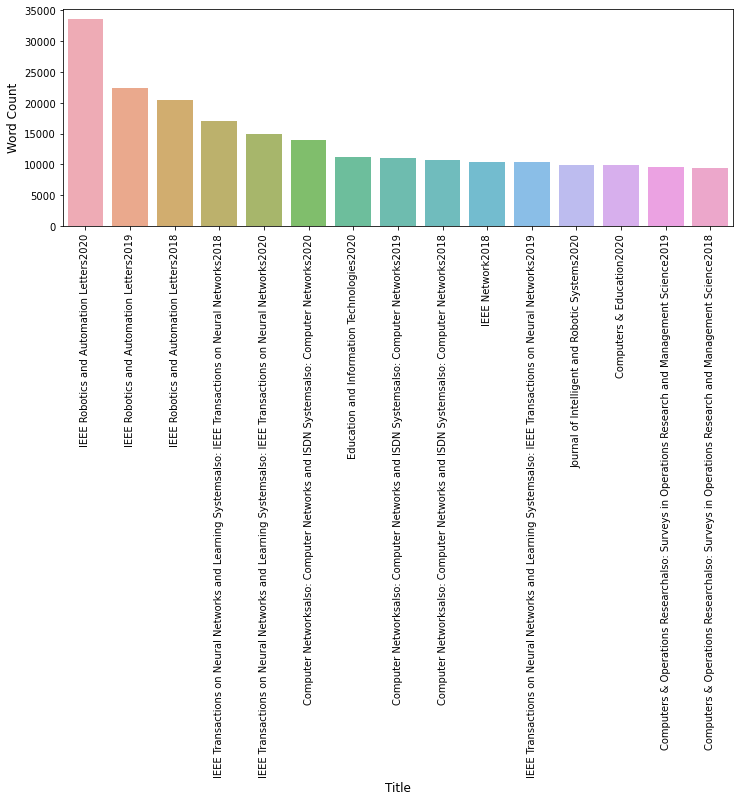

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
cnt_pro = dt['TitleYear'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['TitleYear'], dt['Count'] , alpha=0.8)
plt.ylabel('Word Count', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [11]:
df.head(20)

Title  \
0                            Computers & Education   
1                            Computers & Education   
2                            Computers & Education   
3                       Computer Science Education   
4                       Computer Science Education   
5                       Computer Science Education   
6           Education and Information Technologies   
7           Education and Information Technologies   
8           Education and Information Technologies   
9          ACM Transactions on Computing Education   
10         ACM Transactions on Computing Education   
11         ACM Transactions on Computing Education   
12  Computer Applications in Engineering Education   
13  Computer Applications in Engineering Education   
14  Computer Applications in Engineering Education   
15        Journal of Computing in Higher Education   
16        Journal of Computing in Higher Education   
17        Journal of Computing in Higher Education   
18                Online Social Networks and Media   
19                Online Social Networks and Media   

                                              Content  Year  ImpactFactor  \
0     { COMPUTERS & EDUCATİON }  Headers: {  Volum...  2020          3.63   
1    { COMPUTERS & EDUCATİON }  Headers: {  Volume...  2019          3.63   
2    { COMPUTERS & EDUCATİON }  Headers: {  Volume...  2018          3.63   
3    { COMPUTER SCİENCE EDUCATİON } https://dblp.u...  2020          0.80   
4    { COMPUTER SCİENCE EDUCATİON } https://dblp.u...  2019          0.80   
5     { COMPUTER SCİENCE EDUCATİON } https://dblp....  2018          0.80   
6    { EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...  2020          1.65   
7    { EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...  2019          1.65   
8    { EDUCATİON AND INFORMATİON TECHNOLOGİES } ht...  2018          1.65   
9    { ACM TRANSACTİONS ON COMPUTİNG EDUCATİON (TO...  2020          0.99   
10   { ACM TRANSACTİONS ON COMPUTİNG EDUCATİON (TO...  2019          0.99   
11   { ACM TRANSACTİONS ON COMPUTİNG EDUCATİON (TO...  2018          0.99   
12   { COMPUTER APPLİCATİONS İN ENGİNEERİNG EDUCAT...  2020          0.33   
13   { COMPUTER APPLİCATİONS İN ENGİNEERİNG EDUCAT...  2019          0.33   
14   { COMPUTER APPLİCATİONS İN ENGİNEERİNG EDUCAT...  2018          0.33   
15   { JOURNAL OF COMPUTİNG İN HİGHER EDUCATİON } ...  2020          0.66   
16   { JOURNAL OF COMPUTİNG İN HİGHER EDUCATİON } ...  2019          0.66   
17   { JOURNAL OF COMPUTİNG İN HİGHER EDUCATİON } ...  2018          0.66   
18   { ONLİNE SOCİAL NETWORKS AND MEDİA }  Headers...  2020          2.15   
19   { ONLİNE SOCİAL NETWORKS AND MEDİA }  Headers...  2019          2.15   

    AcceptanceRate  Reviewtime  \
0              0.2           4   
1              0.2           4   
2              0.2           4   
3              0.2           8   
4              0.2           8   
5              0.2           8   
6              0.2           8   
7              0.2           8   
8              0.2           8   
9              0.2           8   
10             0.2           8   
11             0.2           8   
12             0.2           8   
13             0.2           8   
14             0.2           8   
15             0.2           8   
16             0.2           8   
17             0.2           8   
18             0.2           8   
19             0.2           8   

                                            TitleYear  Count  
0                           Computers & Education2020   9846  
1                           Computers & Education2019   8485  
2                           Computers & Education2018   8900  
3                      Computer Science Education2020    704  
4                      Computer Science Education2019    732  
5                      Computer Science Education2018    810  
6          Education and Information Technologies2020  11174  
7          Education and Information Technologies2019   6985  
8         

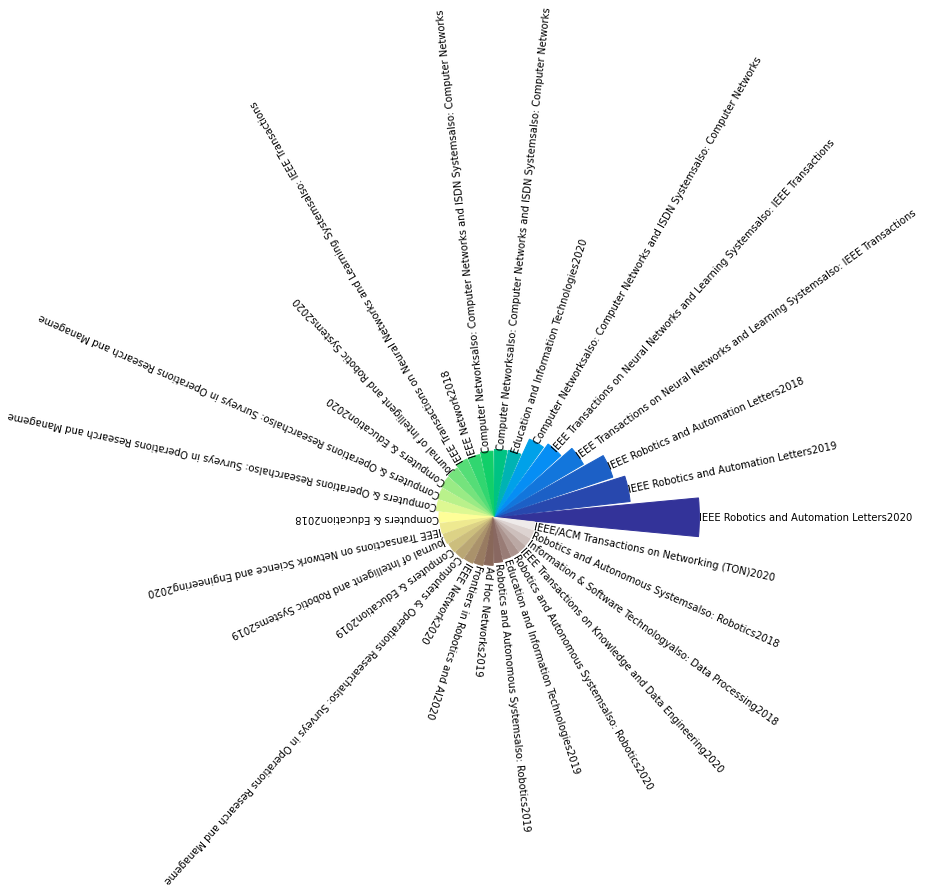

In [12]:
#top 10
dt=df.sort_values(by=['Count'], ascending=False).head(30)

from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm

lObjectsALLcnts = dt['Count'] 

lObjectsALLlbls = dt['TitleYear'].str[:80]#df['col'] = df['col'].str[:9]

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.9
bottom = 50

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom)

plt.axis('off')

rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    lab = ax.text(x,bottom+bar.get_height() , label, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor",)   
for i in range(iN): 
    c=cm.terrain(i / iN) 
    bars[i].set_color(c)
    
plt.show()

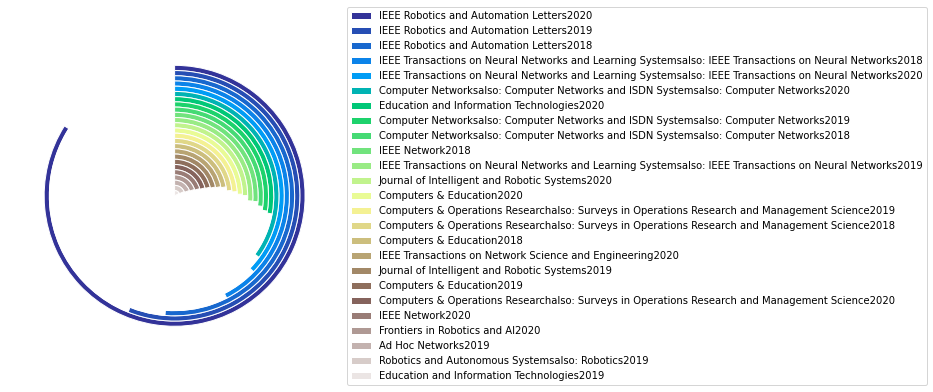

In [13]:
dt=df.sort_values(by=['Count'], ascending=False).head(25)

import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

labels =list(dt['TitleYear'].tolist()) #list("ABCDEFGh") df.values.tolist()
data =dt['Count'].tolist()  #[21, 57, 88, 14, 76, 91, 26,26]
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

#plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [14]:
data=df['Content']

In [1]:
#it didnt work
import re
# bs4 needs to download
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    
    # to remove numeric digits from string 
    text = ''.join([i for i in text  if not i.isdigit()])     
    
    # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]  
    
   
   
    # stemming of words
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in words]
    #porter.tokens.tostring();
    
    #Lemmatization
    # import these modules 
    from nltk.stem import WordNetLemmatizer 
    wn = WordNetLemmatizer()
    w = [wn.lemmatize(word) for word in stemmed]
    
    text = " ".join(w)
    
    print(text)
    return text


In [16]:
#it didnt work
import re
# bs4 needs to download
from bs4 import BeautifulSoup
def cleanTextOld(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')      #%34
      
     # to remove numeric digits from string 
    text = ''.join([i for i in text  if not i.isdigit()])    
   
     # split into words
    from nltk.tokenize import word_tokenize
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    import string
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    # removing stopwords
    text = " ".join([word for word in words if word not in stop_words])
   

    # remove punctuation
    import string 
  #  punct = set(string.punctuation) 
  #  text = "".join([ch for ch in text if ch not in punct])
    
     # stemming of words
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in text.split()]
    
     #Lemmatization
    # import these modules 
    from nltk.stem import WordNetLemmatizer 
    wn = WordNetLemmatizer()
    w = [wn.lemmatize(word) for word in stemmed]
    
    text = " ".join(w)
   
    print(text)
     
   
    return text

In [17]:
import numpy as np

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File, encoding="utf8")
  #  f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

In [18]:
model=loadGloveModel("glove.6B/glove.6B.50d.txt")

Loading Glove Model
400000  words loaded!


In [19]:
myTitle="Multiple Choice Question and Answer Web App";
#replace
myTitle.replace(",", " ; ")
#repat 3 times 
myTreapleTitle=myTitle+myTitle+myTitle

In [20]:
myAbstract="""Online examination is a fundamental part of the online education which enables the evaluation
of education quality and students learning outcomes Nowadays many universities and
education centres are trying to get involved with online education by allowing the students to
take online courses modules Online testing and examination are also one of the major parts of
the online education system Therefore an online exam application was developed which helps
lecturers teachers to create web-based exams tests and measure their student learning
outcomes A Microsoft SQL Server 2014 database was used to store the data of the application
by using normalization rules The CSharp language and Aspnet platform were chosen for
development of the web application In conclusion a web-based exam application was released
with many valuable functionalities such as uploading a list of users using with excel sheet
reporting students results and feedback in an elegant platform and showing the correct and
incorrect answers of the students during exam
Web applications provide a cheaper and a more efficient means of accomplishing tasks Online
applications can enable one to measure the student abilities and learning outcomes One of
the best ways to measure learning outcomes is through tests quizzes exams These help
lecturers teachers examiners to understand which topics have been understood and to what
extent Moreover traditional testing requires a lot of intermediary processes such as creating
a test paper and making numerous copies of it During this process errors are likely to occur
in the questions or designs and examiners then have to correct their mistakes and repeat the
same process again Hence it can cause waste of time and resources Furthermore asking
assistants to copy a test or exam paper is not secure; there is the possibility of the leaking of
exam questions On the other hand an online test makes this process easy and secure It also
has some additional advantages such as allowing users to change the order of questions and
their choices So during the exam if any student tries to cheat by peeking at another student’s
answers it will be harder for them to find the right question and therefore its answer
Additionally it makes teacher jobs relatively easy as they can add many questions to the test
and then request that the server generate a randomly chosen set of questions for each
student class which will help them to create a lot of different tests from the list of questions
which have already been uploaded This feature can help teachers to save their time by using a
question bank"""
#replace the comma with semicolumn
myAbstract.replace(",", " ; ")
myAbstract=myAbstract;

In [21]:
myProfile=""" Ertan Bütün;Mehmet Kaya; 2020 IEEE Trans. Cybern.
 Shalaw Mshir;Mehmet Kaya; 2020 ISDFS
 Vignesh Balasubramanian;John K.-J. Li;Dorene O'Hara;Mehmet Kaya; 2019 Comput. Biol. Medicine
 Mehmet Kaya;Vignesh Balasubramanian;Yueya Ge;John K.-J. Li; 2019 Comput. Biol. Medicine
 Mehmet Kaya;Vignesh Balasubramanian;John K.-J. Li; 2019 Comput. Biol. Medicine
 Mehmet Resul Bilginci;Gamze Ogcu Kaya;Ali Turkyilmaz; 2019 Int. J. Inf. Syst. Serv. Sect.
 Mehmet Kayaalp; 2019 AMIA
 Ahmet Anil Müngen;Emre Dogan;Mehmet Kaya; 2019 ASONAM
 Hüseyin Vural;Mehmet Kaya;Reda Alhajj; 2019 ASONAM
 Zhala Sarkawt Othman;Mehmet Kaya; 2019 ISDFS
 Mehmet Alegoz;Onur Kaya;Z. Pelin Bayindir; 2019 OR
 Mehmet Kaya;Reda Alhajj; 2019 Lecture Notes in Social Networks
 Mehmet Kaya;Vignesh Balasubramanian;Amit M. Patel;Yueya Ge;John K.-J. Li; 2018 Comput. Biol. Medicine
 John K.-J. Li;Mehmet Kaya;Peter L. M. Kerkhof; 2018 Comput. Biol. Medicine
 Hüseyin Vural;Mehmet Kaya; 2018 Comput. Biol. Medicine
 Serpil Aslan;Mehmet Kaya; 2018 Future Gener. Comput. Syst.
 Ertan Bütün;Mehmet Kaya;Reda Alhajj; 2018 Inf. Sci.
 Ahmet Anil Müngen;Mehmet Kaya; 2018 Soc. Netw. Anal. Min.
 Mehmet Kayaalp; 2018 AMIA
 Betul Bulut;Buket Kaya;Reda Alhajj;Mehmet Kaya; 2018 ASONAM
 Ayse Geckil;Ahmet Anil Mungen;Esra Gündogan;Mehmet Kaya; 2018 ASONAM
 Hüseyin Vural;Buket Kaya;Reda Alhajj;Mehmet Kaya; 2018 ASONAM"""
myProfile.replace(",", " ; ")


" Ertan Bütün;Mehmet Kaya; 2020 IEEE Trans. Cybern.\n Shalaw Mshir;Mehmet Kaya; 2020 ISDFS\n Vignesh Balasubramanian;John K.-J. Li;Dorene O'Hara;Mehmet Kaya; 2019 Comput. Biol. Medicine\n Mehmet Kaya;Vignesh Balasubramanian;Yueya Ge;John K.-J. Li; 2019 Comput. Biol. Medicine\n Mehmet Kaya;Vignesh Balasubramanian;John K.-J. Li; 2019 Comput. Biol. Medicine\n Mehmet Resul Bilginci;Gamze Ogcu Kaya;Ali Turkyilmaz; 2019 Int. J. Inf. Syst. Serv. Sect.\n Mehmet Kayaalp; 2019 AMIA\n Ahmet Anil Müngen;Emre Dogan;Mehmet Kaya; 2019 ASONAM\n Hüseyin Vural;Mehmet Kaya;Reda Alhajj; 2019 ASONAM\n Zhala Sarkawt Othman;Mehmet Kaya; 2019 ISDFS\n Mehmet Alegoz;Onur Kaya;Z. Pelin Bayindir; 2019 OR\n Mehmet Kaya;Reda Alhajj; 2019 Lecture Notes in Social Networks\n Mehmet Kaya;Vignesh Balasubramanian;Amit M. Patel;Yueya Ge;John K.-J. Li; 2018 Comput. Biol. Medicine\n John K.-J. Li;Mehmet Kaya;Peter L. M. Kerkhof; 2018 Comput. Biol. Medicine\n Hüseyin Vural;Mehmet Kaya; 2018 Comput. Biol. Medicine\n Serpil As

In [22]:
myCitation="""J. H. W. Dana S. Dunn   Best Practices for Technology-Enhanced Teaching and Learning   198 Madison Avenue   New York   New York 10016: Oxford University Press   2011. 
  Appappeal     19 April 2011. [Online]. Available: http://www.appappeal.com/articles/10-reasons-to-use-web-apps-instead-of-desktop-apps.
Q. L. Rynson W.H Lau     Advanced In Web-Based Learning -ICWL-2005     2005   p. 99.
  SCORM Cloud Pricing     [Online]. Available: http://scorm.com/scorm-solved/scorm-cloud-pricing/.
  ProProf Quiz Maker     [Online]. Available: http://www.proprofs.com/quiz-school/.
  CAQ (Create a Quiz/Test Maker)     [Online]. Available: https://play.google.com/store/apps/details?id=com.dotpubs.customQuiz&hl=en.
R. E. Sikha Bagui   Database Design Using Entity-Relationship Diagrams   Taylor & Francis Group   2012. 
  N-TIER DESIGNS     [Online]. Available: http://www.teamibr.com/n-tier-designs.php.
W. O. Galitz   The Essential Guide to User Interface Design An Introduction to GUI Design Principles and Techniques   Wiley Publishing   Inc.   2007. 
  Creately     22 03 2016. [Online]. Available: https://creately.com.
U. Abrar     AUTHENTICATION     Profile Based Student Authentication in Online Examination   p. 1. 
  HighCharts 3D column     [Online]. Available: http://www.highcharts.com/demo/3d-column-interactive.
  """


In [23]:
myProfile=myTreapleTitle+myAbstract +myProfile+myCitation

In [24]:
df.loc[len(df.index)] = ["MY Paper",myProfile,"2020","0.99","0.20","8","Comparing Journal Based on Year  ","zero"] 

In [25]:
#clean data again
yeni=df.copy()
df['Content']=df['Content'].apply(cleanTextOld)

comput header volum januari header end titl introduc tablet comput rural primari school activ theori case studi author hamood alhuneini aisha walker richard badger publish date titl access emotion onlin ass feedback use emoticon enhanc student percept marker compet warmth author robyn l moffitt christin r padgett rachel griev publish date titl differ revisit measur teacher technolog accept author ronni scherer fazilat siddiq jo tondeur publish date titl use pedagog agent deliv convers style instruct benefit obtain author lijia lin paul ginn tianhui wang peilin zhang publish date titl effect autom feedback revis behavior learn gain form ass scientif argument write author mengiao zhu ou lydia liu heesun lee publish date titl role interact mode stori structur virtual realiti seriou game author chri ferguson egon l van den broek herr van oostendorp publish date titl profil selfregul behavior stem learn engin design author juan zheng wanli ing gaoia zhu guanhua chen henglv zhao charl ie pub

comput header volum januari header end titl role plan compl problem solv author beat eichmann frank goldhamm samuel greiff lien pucit johann naumann publish date titl technolog accept model tam metaanalyt structur equat model approach eplain teacher adopt digit technolog educ author ronni scherer fazilat siddiq jo tondeur publish date titl learn multipl onlin tet part scientif inquiri classroom author sarah sullivan sadhana puntambekar publish date titl learn code via tablet applic evalu daisi dinosaur author sarah pila fashina aladé kelli sheehan alei r lauricella ellen wartella publish date titl effect mathemat gamebas learn environ primari school student adapt number knowledg author boglárka brezovszki jake mcmullen koen veerman minna hannulasormunen gabriela rodríguezaflecht nonmanut pongsakdi eero laakkonen erno lehtinen publish date titl indepth analysi adult student blend environ regul learn old school way author silk vanslambrouck chang zhu bram pynoo valéri thoma koen lombaert

comput header volum januari header end titl learn symbol perman transient visual present nt overplay hand author juan c castroalonso paul ayr mona wong fred paa publish date titl effect onlin argument socioscientif issu student scientif compet sustain attitud author chunyen tsai publish date titl trend research issu mobil learn studi nurs educ review academ public author chingyi chang chiulin lai gwojen hwang publish date titl effect augment realiti game poké mon go cognit perform emot intellig adolesc young author alberto ruizariza rafael antonio casuso sara suarezmanzano emilio j martínezlópez publish date titl combin ebook mind map reciproc teach strategi classic chine cours author tingt wu anchi chen publish date titl anonym versu identifi peer ass via facebookbas learn applic effect qualiti peer feedback perceiv learn perceiv fair attitud toward system author guanyu lin publish date titl nispi framework analys collabor problemsolv student physic interact author mutlu cukurova rose

url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header titl editori eait issu author arthur tatnal publish date titl converg approach synthesi inform learn environ higher educ author aleey g finogeev lejla gamidullaeva aleandr bershadski ludmila fionova michael deev anton finogeev publish date titl find model latent semant approach reveal topic discus discus forum author reina setiawan widodo budiharto iman herwidiana kartowisastro harjanto prabowo publish date titl effect use geogebra achiev high school mathemat student author hutkemri zulnaidi enni oktavika riyan hidayat publish date titl implement famili awar intervent program parent asd child author endang rochyadi rona wulandari mayasari manar endun sunanda yopi yuliana publish date titl blend learn comput educ work author ellen f monk kevin r guidri kathleen langan puseck thoma w ilvento publish date titl mediat teacher distanc teach learn model eplor 

url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header titl editori eait issu author arthur tatnal publish date titl use electron resourc academ staff univers ilorin nigeria author adeyinka tella faith orim dauda morenikeji ibrahim suleiman ajala memudu publish date titl toward person understand inform technolog student learn uae univers author nabeel alqirim kamel rouibah ali tarhini moham adel serhani aishah rashid yammahi maraim ahm yammahi publish date titl compet analyt tool analyz curriculum use cours compet author swapna gottipati venki shankararaman publish date titl effect motiv academ stress age predict selfdirect learn readi sdlr focus onlin colleg student author jeongchul heo sumi han publish date titl mobil phone use two secondari school tanzania author andrew joycegibbon david galloway andrew mollel sylvest mgoma madelek pima eno deogratia publish date titl investig predict power tam case studi

comput url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header comput titl use cartoon agent visual base html improv learn crystal structur engin author konstadina dalacosta evangelia pavlat publish date titl plant system simul engin train workshop author zuzhen ji dirk pon j pear publish date titl vrock virtual realiti game learn basic concept program author rafael jesú segura francisco j del pino carlo j ogáyar antonio j rueda ruiz publish date titl tecdiy motiv methodolog practic laboratori prepar eam electron subject author cristina rodriguezsánchez imen yahyaoui belén arredondo martin joaquín vaquero lopez publish date titl automat grade softwar cad file author josiah bryan publish date titl adapt learn numer method cours engin evalu blend flip classroom author rene clark autar kaw publish date titl flip classroom engin influenc gender author maría chiquito ricardo castedo anastasio p santo lina lópez co

comput url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header comput titl peer learn efficaci analysi undergradu softwar design cours author pohsun cheng liwei chen publish date titl moam methodolog develop mobil learn object mlo author karen annet saldaña hernández yesenia hernández velázquez eduardo lópez domínguez cora beatriz ecelent toledo maría auilio medina nieto publish date titl euler algorithm solv reaction kinet equat mathemat formul program applic author baudilio coto inmaculada suárez publish date titl design implement realtim monitor tool power engin educ author juan rochadoria octavio mosqueraarevalo césar angelescamacho álvaro espinel ortega jorg guillermo calderón guizar publish date titl visual present abstract theoret concept use anim commun system cours author stevan berber kevin w sowerbi publish date titl eplor effect continu activ automat feedback onlin calculu author teresa sancho vin

network url header volum number decemb header network titl eamin evolut twitter elit network author reza motamedi soheil jamshidi reza rejai walter willing publish date titl inform verif social network base user feedback news agenc author arefeh yavari hedieh sajedi mohammad sanie abadeh publish date titl resili coevolut preferenti interdepend network author auroop ganguli tanay mehta tirthak patel ravi sundaram devesh tiwari publish date titl dynam wavelet fingerprint differenti tweet storm type author spencer lee kirn mark k hinder publish date titl comput studi homophili diffus common knowledg social network base model facebook author gizem korkmaz chri j kuhlman joshua goldstein fernando vegaredondo publish date titl behavior differ insight eplan comparison french u twitter usag elect author ian davidson antoin gourru julien velcin yue wu publish date titl model impact python r packag use depend contributor network author gizem korkmaz clair kell carol robbin salli keller publish d

cyberpsycholog url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header cyberpsycholog titl neurodivers societi role advanc technolog author brenda k wiederhold publish date titl toward europewid patientcentr approach autism spectrum disord author elisabetta vaudano publish date titl mie realiti fullbodi interact eperi encourag social initi autism comparison control nondigit intervent author ciera crowel batuhan sayi juan pedro benitez narcí paré publish date titl virtual realiti air travel train child autism spectrum preliminari report author ian miller brenda k wiederhold catherin miller mark wiederhold publish date titl use augment realiti motioncontrol game util alphabet letter number improv perform reaction time skill peopl autism spectrum disord author jennif yohanna ferreira de lima antã

cyberpsycholog url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header cyberpsycholog titl second life becom real life evolut selfpresent author brenda k wiederhold publish date titl special issu construct self onlin author chri fullwood alison attrillsmith publish date titl import adolesc seualli outgo selfconcept differenti role self othergener sey selfpresent social medium author johanna f van oosten dian de vri jochen peter publish date titl updat rate perceiv date success better onlin offlin author chri fullwood alison attrillsmith publish date titl preval gratif nude selfpresent men se men onlined environ attract attent empower selfverif author richard lemk simon merz publish date titl crosscultur studi riski onlin selfpresent author clair white clara cutello michaela gummerum yaniv hano

ad hoc network header volum januari header end titl maimiz sensor network lifetim activ schedul heurist optim author artur mikitiuk krzysztof trojanowski publish date titl design perform evalu lorabas mobil emerg manag system locat author luca sciullo angelo trotta marco di felic publish date titl comprehens survey enhanc limit rpl protocol focu object function author hanan lamaazi nabil benamar publish date titl energi awar endur framework mission critic aerial network author yusuf özçevik berk canberk publish date titl optim path plan strategi monitor coverag hole wireless sensor network author christoph zygowski arunita jaekel publish date titl deep tensor fusion network multimod groundbas cloud classif weather station network author mei li shuang liu zhong zhang publish date titl uplink resourc alloc multicarri group cognit internet thing base kmean learn author liu min jia hua ding publish date ad hoc network header volum februari header end titl technoeconom framework dynam oper 

ad hoc network header volum januari header end titl rout protocol architectur disast area network survey author yasmin jahir moham atiquzzaman hazem h refai anirudh paranjothi peter g lopresti publish date titl contetawar energyeffici applic cyberphys system author jose miguel horca mónica pinto lidia fuent publish date titl optim floor reserv content resolut wireless random access author mohammad hossein bateni jamaloddin golestani ali mohammad doosthoseini publish date titl outag minim relay assist cognit radio network energi harvest author avik banerje santi p maiti publish date titl lifetimeawar inform aggreg uncertainti advanc driver assist system author tobia meuser patrick lieser binh nguyen doreen böhnstedt ralf steinmetz publish date titl structur health monitor use wireless sensor network structur element author cem ayyildiz h emr erdem tamer dirikgil oguz dugenc taskin koçak fatih altun vehbi cagri gungor publish date titl mobivndn distribut framework support mobil vehicular

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl editori decemb author tommaso melodia antonio iera publish date titl bufferaid cooper spectrum share fulldupl wirelesspow relay author kun tang shaowei liao publish date titl droi energyeffici virtual network embed algorithm base dynam region interest author mengyang lei zhuang shuaikui tian guoq wang kunli zhang publish date titl acop adapt semisupervis learn approach complepolici enforc highbandwidth network author morteza noferesti rasool jalili publish date titl practic implement propag delay clock skew compens highprecis time synchron scheme resourceconstrain sensor node multihop wireless sensor network author intao huan kyeong soo kim publish date titl machin learningdriven servic function chain placement scale mecen g network author teja subramanya davit harutyunyan roberto riggio publish date titl cluster algorithm effici energi manag mobil adhoc network author sey ali sharif

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl comput network comnet editori author ian f akyildiz harri rudin burkhard stiller publish date titl mobil robot wireless sensor network survey task author hailong huang andrey v savkin ming ding chao huang publish date titl mohop protocol provid mobil manag host privaci author jaehyun park jaehe ha brent byunghoon kang myungchul kim publish date titl approach personnel locat roadway environ base multisensor fusion activ classif author yazhou yuan iaoqin sun zhiin liu yuefeng li inp guan publish date titl data replica placement strategi iot workflow collabor edg cloud environ author yanl shao chunlin li hengliang tang publish date titl doubl warn threshold preemptiv charg schedul wireless recharg sensor network author chi lin yu sun kai wang zhunyu chen bo u guowei wu publish date titl data evacu data center disasteraffect region softwaredefin satellit network author rafael b r lourenç

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl editori comnet author ian f akyildiz harri rudin burkhard stiller publish date titl topolog map algorithm wireless sensor network base maimum likelihood estim author ashani gunathillak andrey v savkin anura p jayasumana publish date titl finegrain respons time analysi techniqu heterogen environ author aymen hafsaoui abdulhalim dandoush guillaum urvoykel matti siekkinen deni collang publish date titl analys improv converg quantiz congest notif data center ethernet author ran shu fengyuan ren jiao zhang tong zhang chuang lin publish date titl joint power effici server network consolid approach virtual data center author antonio marotta stefano avallon andrea kassler publish date titl powerawar gateway connect batterypow dynam iot network author surabhi abhimithra karthikeya revathi narayanan c siva ram murthi publish date titl potenti trend prospect edg technolog fog cloudlet mobil edg

ieee network url header volum number januari februari volum number march april volum number may june volum number juli august volum number septemb octob volum number novemb decemb header ieee network titl scan literatur author iaohua tian publish date titl blockchain scalabl iot manag access account author bechir hamdaoui ammar ray nizar zorba lingyang song christo v verikouki publish date titl secur smart citi blockchain technolog architectur requir challeng author saqib hakak wazir zada khan gulshan amin gilkar muhammad imran nadra guizani publish date titl blockchain manag heterogen internet thing perspect architectur author lewi tseng liwen wong safa otoum moayad aloqaili jalel benothman publish date titl blockchainempow secur spectrum share g heterogen network author zhenyu zhou inyi chen yan zhang shahid mumtaz publish date titl integr blockchain iotit safer road author najah abu ali abdelhamid taha ezedin barka publish date titl diota decentralizedledgerbas framework data authen

ieee network url header volum number januari februari volum number march april volum number may june volum number juli august volum number septemb octob volum number novemb decemb header ieee network titl space terrestri integr network author mohsen guizani publish date titl scan literatur author iaohua tian publish date titl space terrestri integr network emerg research advanc prospect challeng author hanchieh chao dougla e comer odej kao publish date titl sistin smart identifi framework space terrestri integr network author su yao jianfeng guan zhiwei yan ke u publish date titl heterogen space terrestri integr network iot architectur challeng author weich chien chinfeng lai shamim hossain ghulam muhammad publish date titl softwar defin spaceterrestri integr network architectur challeng solut author yuanguo bi guangji han shuang u ingwei wang chuan lin zhibo yu peiyao sun publish date titl crossdomain sdn architectur multilay spaceterrestri integr network author yongpeng shi yurui cao

ieee url header volum number march volum number june volum number septemb volum number decemb header ieee titl impact heterogen fade channel power limit cognit radio network author shaoji zhang abdelhakim senhaji hafid haitao zhao wang publish date titl perform analysi clusterbas multihop underlay crn use malinkselect protocol author hari krishna boddapati manav r bhatnagar shankar prakriya publish date titl channelbeam handoff control multibeam antenna base cognit radio network author koushik john matyja fei hu sunil kumar publish date titl new probabilist target channel select approach load balanc cognit radio network author ahm f tayel sherif rabia publish date titl robust resourc alloc joint carrier aggreg multicarri cellular network author haya shajaiah ahm abdelhadi charl clanci publish date titl throughput underlay cognit energi harvest relay network improv timeswitch protocol author komal janghel shankar prakriya publish date titl joint power alloc rout select outag minim multi

ieee control network system url header volum number march volum number june volum number septemb volum number decemb header ieee control network system titl stochast robust simul stabil properti chemic reaction network author corrado possieri andrew r teel publish date titl leaderfollow synchron coupl homogen heterogen harmon oscil base rel posit measur author qiang song fang liu jind cao athanasio v vasilako yang tang publish date titl riskavers access point select wireless commun network author wannjiun chanwook oh yang liu darinka dentcheva michael zavlano publish date titl optim waterpow flowproblem formul distribut optim solut author ahm zamzam emiliano dallanes changhong zhao josh taylor nichola sidiropoulo publish date titl worstcas innovationbas integr attack side inform remot state estim author ziyang guo dawei shi karl henrik johansson ling shi publish date titl differenti privat consensu eventtrigg mechan author lan gao shaojiang deng wei ren publish date titl attractor stab

ieee green url header volum number march volum number june volum number septemb volum number decemb header ieee green titl first year green radio author shunq zhang shugong u geoffrey ye li ender ayanoglu publish date titl coordin load control renew power small base station layer learn author marco miozzo nicola piovesan paolo dini publish date titl multiobject power minim design energi effici multicel multius mimo beamform system author weiyu chen poya hsieh borsen chen publish date titl power alloc energyeffici massiv mimo system imperfect csi author hao li zhigang wang houjun wang publish date titl latencyenergi perform nbiot system provid widearea iot connect author amin azari cedomir stefanov petar popovski cicek cavdar publish date titl distribut green offload power optim virtual small cell network mobil edg comput author yulun cheng jun zhang longiang yang chenm zhu hongbo zhu publish date titl framework energi effici maimiz hetnet millimet wave backhaul link author sylvest b ab

ieee network url header volum number januari march volum number april june volum number juli septemb volum number octob decemb header ieee network titl introduct special section big data artifici intellig network technolog author jie li jinsong wu bin hu chonggang wang mahmoud daneshmand reza malekian publish date titl applic behavior driven selforgan network son g lte network author ye ouyang zhongyuan li le su wenyuan lu zhenyi lin publish date titl dcauth datacentr authent secur innetwork bigdata retriev author ruidong li hitoshi asaeda jie wu publish date titl learningbas dynam resourc provis network slice ensur endtoend perform bound author qian u jianp wang kui wu publish date titl crowd meet big video data cloudedg collabor transcod person livecast author yifei zhu qiyun jiangchuan liu bo li yuem hu publish date titl trustworthi websit detect base social hyperlink network analysi author iaofei niu guangchi liu qing yang publish date titl trustbas social network comput cach commu

ieee network manag url header volum number march volum number june volum number septemb volum number decemb header ieee network manag titl review ieee transact network servic manag tnsm author filip de turck publish date titl guest editori special section cybersecur techniqu manag network system author rémi badonnel carol fung qi li sandra scotthayward publish date titl botchas graphbas bot detect use machin learn author abba abou daya mohammad salahuddin noura limam raouf boutaba publish date titl analyz data granular level insid threat detect use machin learn author duc c le nur zincirheywood malcolm heywood publish date titl iotkeep detect malici iot network activ use onlin traffic analysi edg author ibbad hafeez markku antikainen aaron yi ding sasu tarkoma publish date titl manag iot cybersecur use programm telemetri machin learn author arunan sivanathan hassan habibi gharakheili vijay sivaraman publish date titl incrementallydeploy penabl architectur networkwid heavyhitt detect au

ieee network manag url header volum number march volum number june volum number septemb volum number decemb header ieee network manag titl guest editori special section advanc big data analyt manag author giuliano casal yiin diao marco mellia rajiv ranjan nur zincirheywood publish date titl awesom big data automat web servic manag sdn author martino trevisan idilio drago marco mellia han hee song mario baldi publish date titl big data analysisbas secur cluster manag optim control plane softwaredefin network author jun wu mianiong dong kaoru ota jianhua li zhitao guan publish date titl spatialtempor predict model activ ticket manag data center author ji ue robert birk lydia chen evgenia smirni publish date titl mine causal network event log data author satoru kobayashi kazuki otomo kensuk fukuda hiroshi esaki publish date titl detect botcloud larg scale decentr robust detect method multiten virtual environ author rémi cogrann guillaum doyen nisrin ghadban badi hammi publish date titl an

ieee neural network systemsalso ieee neural network url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee neural network systemsalso ieee neural network titl editori anoth success year look forward author haibo publish date titl neuromemrist circuit edg comput review author olga krestinskaya ale pappachen jame leon ong chua publish date titl spatial arrang spar recurr neural network energi effici associ memori author gouhei tanaka ryosho nakan tomoya takeuchi toshiyuki yaman daiju nakano yasunao katayama akira hiros publish date titl unifi entropybas distanc metric ordinalandnominalattribut data cluster author yiqun zhang yium cheung kay chen tan publish date titl geco classif restrict boltzmann machin hardwar onchip semisupervis learn bayesian infer author wooseok yi junki park jaejoon

ieee neural network systemsalso ieee neural network url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee neural network systemsalso ieee neural network titl editori boom neural network learn system author akira hiros alessio mich artur davila garcez choon ki ahn gang pan hamid reza karimi jianb shen josé de jesú rubio lei zhang lingjia liu lorenzo livi nian zhang nishchal k verma pedro antonio gutiérrez qi tian qinglai wei seiichi ozawa stuart h rubin weineng chen li iaofeng liao youmin zhang zhen ni haibo publish date titl deep cnnbase blind imag qualiti predictor author jongyoo kim anhduc nguyen sanghoon lee publish date titl neuroadapt control given perform specif strict feedback system fullstat constraint author iucai huang yongduan song junfeng lai publish date titl consensu probl

ieee neural network systemsalso ieee neural network url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee neural network systemsalso ieee neural network titl growth success look forward beyond author haibo publish date titl broad learn system effect effici increment learn system without need deep architectur author c l philip chen zhulin liu publish date titl hair segment use heuristicallytrain neural network author wenzhangzhi guo parham aarabi publish date titl eventbas robust control uncertain nonlinear system use adapt dynam program author qichao zhang dongbin zhao ding wang publish date titl effici representationbas method boundari point outlier detect author iaoji li jiancheng lv zhang yi publish date titl develop quantum local potenti function network base quantum assimil subspac

ieeeacm ton url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieeeacm ton titl find persist item distribut dataset author haipeng dai meng li ale liu jiaqi zheng guihai chen publish date titl optim inform fresh wireless network gener interfer constraint author rajat talak sertac karaman eytan modiano publish date titl design perform evalu implant ultrason network platform internet medic thing author giusepp enrico santagati neil dave tommaso melodia publish date titl robust loss infer presenc noisi measur hidden fault diagnosi author yan qiao jun jiao inhong cui yuan rao publish date titl measur analysi enhanc multipath tcp energi effici datacent author jia zhao jiangchuan liu haiyang wang chi u wei gong changqiao u publish date titl prospect theoret analysi privacypreserv mechan author guocheng liao u chen jianwei huang publish date titl dynam control ondemand interferencemanag wlan infrastructur aut

ieeeacm ton url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieeeacm ton titl toward cloudbas distribut interact applic measur model analysi author haiyang wang tong li ryan shea iaoqiang feng wang jiangchuan liu ke u publish date titl vanet broadcast contetawar class base broadcast author falko dressler florian klingler christoph sommer reuven cohen publish date titl probabilist framework structur analysi commun detect direct network author chengshang chang duanshin lee liheng liou shengmin lu muhuan wu publish date titl rate region singlechannel multichannel fulldupl link author jelena diakonikola gil zussman publish date titl asynchron coordin multitimescal beamform architectur multicel network author antonio michaloliako wengchon ao konstantino psouni yonglong zhang publish date titl optim internet transit rout content deliveri network author faraz ahm zubair shafiq amir r khakpour ale liu publis

acm survey url header volum number may volum number june volum number june volum number septemb volum number octob header acm survey titl interact cluster comprehens review author juhe bae tove helldin maria riveiro slawomir nowaczyk mohamedrafik bouguelia göran falkman publish date titl decentr trust manag risk analysi trust aggreg author inin fan ling liu rui zhang quanliang jing jingp bi publish date titl scalabl deep learn distribut infrastructur challeng techniqu tool author ruben mayer hansarno jacobsen publish date titl survey compil test author junji chen jibesh patra michael pradel yingfei iong hongyu zhang dan hao lu zhang publish date titl ideal versu real revisit histori virtual machin contain author allison randal publish date titl improv perform energi consumpt embed system via binari acceler survey author nuno paulino joão cana ferreira joão p cardoso publish date titl model influenc semant social network survey author gerasimo razi ioanni anagnostopoulo sherali zeadal p

acm survey url header volum number april volum number june volum number juli volum number septemb volum number januari volum number januari header acm survey titl approim commun techniqu reduc commun bottleneck largescal parallel system author filip betzel karen khatamifard harini suresh david j lilja john sartori ulya r karpuzcu publish date titl analysi classif shapechang interfac design applicationbas research author miriam sturde jason aleand publish date titl survey onlin judg system applic author szymon wasik maciej antczak jan badura artur laskowski tomasz sternal publish date titl metamorph test review challeng opportun author tsong yueh chen feich kuo huai liu paklok poon dave towey h tse zhi quan zhou publish date titl survey usag eyetrack comput program author unaizah obaidellah moham al haek peter ch cheng publish date titl survey access control communitycent collabor system author federica paci anna cinzia squicciarini nicola zannon publish date titl qualiti control crowds

comput researchalso survey research manag header volum januari header end titl accur optim model interfer constrain bandwidth alloc cellular network author grit ecker di yuan ari c koster ank schmeink publish date titl distribut robust singl machin schedul total tardi criterion author shengsheng niu shiji song jianya ding yuli zhang raymond chiong publish date titl new solut approach capacit supplier select problem total quantiti discount activ cost demand uncertainti author daniel manerba guido perboli publish date titl effect method solv bicriteria p author golbarg k tutunchi yahya fathi publish date titl trajectori plan autonom underwat vehicl presenc obstacl nonlinear flow field use mie integ nonlinear program author tong wang ricardo lima loïc giraldi omar knio publish date titl determinist alloc model multiperiod demand fulfil multistag custom hierarchi author jaim canobelmán herbert meyr publish date titl threemachin flow shop schedul overlap wait time constraint author hyunjung

comput researchalso survey research manag header volum januari header end titl metaheurist tabu cluster travel salesman problem author tianjiao zhang liangjun ke jing li jisheng li jingqi huang zei li publish date titl note linear program model stochast dynam capacit lot size problem author thoma van pelt jan c fransoo publish date titl linear program base algorithm solv class optim problem multilinear object function affin constraint author hadi charkhgard martin w p savelsbergh masoud talebian publish date titl bender decomposit appli robust multipl alloc incomplet hub locat problem author elisangela martin de sá reinaldo morabito ricardo saraiva de camargo publish date titl workload smooth simpl assembl line balanc author meral azizoglu sadullah imat publish date titl corridorbas metro network design travel flow captur author gabriel gutiérrezjarpa gilbert laport vladimir marianov publish date titl stochast local search learn automaton swapbodi vehicl rout problem author túlio toffo

ieee survey url header volum number firstquart volum number secondquart volum number thirdquart volum number fourthquart header ieee survey titl editori first quarter ieee commun survey tutori author yingdar lin publish date titl integr network cach comput wireless system survey research issu challeng author chenmeng wang ying f richard yu qianbin chen lun tang publish date titl critic analysi research potenti challeng futur direct industri wireless sensor network author mohsin raza nauman aslam hoa le minh sajjad hussain yue cao noor muhammad khan publish date titl stateoftheart medium access control mac protocol underwat acoust network survey base mac refer model author shengm jiang publish date titl waveform overview beamform author qinyi u chuniao jiang yi han beibei wang k j ray liu publish date titl spectrum infer cognit radio network algorithm applic author guoru ding yutao jiao jinlong wang yulong zou qihui wu yudong yao lajo hanzo publish date titl fragment problem manag appro

advanc url header volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number header advanc titl special issu cyborg bionic system ii author taisuk masuda qing shi publish date titl intellig mobil walkingaid percept control safeti author qingyang yan jian huang chunj tao ine chen wenia u publish date titl effect passiv eoskeleton muscl activ metabol cost energi author wei wei wei wang zhicheng qu jihua gu ichuan lin chunfeng yue publish date titl vocal cord abnorm voic flow field studi model bionic vocal system author iaojun zhang yan wang wei zhao wei wei zhi tao heme zhao publish date titl robot hipdisarticul prosthesi evalu prosthet gait nonampute individu author yuki ueyama tsutomu kubo masaaki shibata publish date titl fleibl needl postur control stratagem ultrasoundbas p

advanc url header volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number header advanc titl model reson suppress control electrohydrostat actuat twomass reson system author tomoki sakuma kenta tsuda koudai umeda sho sakaino toshiaki tsuji publish date titl role quantit inform slip grip forc prosthet grasp stabil author dana damian marco fischer aleandro hernandez arieta rolf pfeifer publish date titl robot fish twodof pector fin wiredriven caudal fin author yong zhong zheng li ruu du publish date titl design multilinkarticul wheel pipelin inspect robot use passiv elast joint author atsushi kakogawa shugen publish date titl literatur review current trend transfemor power prosthet author carlo manuel larabarrio andré blancoortega cesar

trend url header volum number volum number volum number header
trend url header volum number volum number volum number header trend titl algorithm perspect imit learn author takayuki osa joni pajarinen gerhard neumann j andrew bagnel pieter abbeel jan peter publish date titl model control state estim path plan method autonom multirotor aerial robot author christo papachristo tung dang shehryar khattak frank mascarich nikhil khedekar kosta alei publish date titl embodi social interact robot author eric deng bilg mutlu maja j matar publish date trend url header volum number volum number volum number header
ai url header volum header ai titl design ethic social robot longitudin field studi older adult author anouk van mari nanci zook praminda calebsolli matthew studley alan f winfield sanja dogramadzi publish date titl marin applic fast march method author santiago garrido david álvarez lui moreno publish date titl underwat robot competit european robot leagu emerg robot eperi feelhippo a

ai url header volum header ai titl humanoid cognit robot learn imit implic conscious studi author jame reggia garrett e katz gregori p davi publish date titl directli printabl fleibl strain sensor bend contact feedback soft actuat author khale elgeneidi gerhard neumann michael r jackson niel lohs publish date titl insight social behavior surfac cavedwel fish poecilia meicana light dark use biomimet robot author david bierbach julian luka anja bergmann kristian elsner leander höhne christian weber nil weimar lenin ariasrodriguez hauk j mönck hai nguyen pawel romanczuk tim landgraf jen kraus publish date titl model control adjust articul parallel compliant actuat arrang articul robot author wesley rooz publish date titl yarpro interoper navig task author marco randazzo andrea ruzzenenti lorenzo natal publish date titl seai social emot artifici intellig base damasio theori mind author lorenzo cominelli daniel mazzei danilo de rossi publish date titl virtual realiti nonordinari conscious a

ieee url header volum number march volum number june volum number septemb volum number decemb header ieee titl technolog neutral editor desk author bram vanderborght publish date titl aim better robot standard industri activ author tamá haidegg publish date titl flourish landscap robot standard industri activ author theo jacob jan f veneman gurvind virk tamá haidegg publish date titl inspir independ woman engin author laura margheri publish date titl wearabl robot motion assist rehabilit tc spotlight author samer moham juan c moreno thoma sugar yasuhisa hasegawa nicola vitiello qine wang conor j walsh publish date titl ethercat tutori introduct realtim hardwar commun window tutori author kevin langloi tom van der hoeven david rodriguezcianca tom verstraten tomislav bacek bryan conven carlo rodriguez guerrero victor grosu dirk lefeb bram vanderborght publish date titl socioeth approach robot develop guest editor author noel sharkey aime van wynsbergh john c haven katina michael publish 

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl fpr fast path risk algorithm evalu collis probabl author andrew blake alejandro bordallo kamen brestnichki majd hawasli svetlin valentinov penkov subramanian ramamoorthi aleandr silva publish date titl effici wrenchclosur interferencefre condit verif cabledriven parallel robot trajectori use raybas method author zeqe zhang hung hon cheng darwin lau publish date titl robot manipul plan shape deform linear object withenvironment contact author jihong zhu benjamin navarro robin passama philipp fraiss andré crosnier andrea cherubini publish date titl dataeffici geometr inspir polynomi kernel robot invers dynam author alberto dalla libera ruggero carli publish date titl improv accuraci robust ultrawideband local sensor fusion outlier detect author nathan dwek merwan birem kurt geebelen erik hosten anurodh mishra jan steckel risang yudanto publish date titl workspac det

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl quadricslam dual quadric object detect landmark objectori slam author lachlan nicholson michael milford niko sünderhauf publish date titl etend threedimension walk skate motion gener multipl noncoplanar contact anisotrop friction applic walk skateboard roller skate author noriaki takasugi kunio kojima shunichi nozawa fumihito sugai youhei kakiuchi kei okada masayuki inaba publish date titl soft pneumat actuat haptic wearabl devic upper limb ampute toward soft robot liner author juan j huaroto etsel suarez hermano igo kreb paul marasco emir augusto vela publish date titl control design soft robot base reducedord model author maim thieffri aleandr kruszewski christian duriez thierrymari guerra publish date titl author junnan song shalabh gupta thoma wettergren publish date titl asymptot stabil nonholonom robot leverag singular author zhengguo li wenchao gao changzuo

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl multimod trip hazard afford detect construct site author sean mcmahon niko sünderhauf ben upcroft michael milford publish date titl chiller plant oper optim minimum updown time constraint author danu zhang peter b luh junqiang fan shalabh gupta publish date titl pneumat artifici muscl manufactur selfheal polym repair macroscop damag author sepp terryn joost brancart dirk lefeb guy van assch bram vanderborght publish date titl batteri cell reconfigur epedit charg equal seriesconnect batteri system author weiji han liang zhang publish date titl leg motion plan compl threedimension environ author andrew short tirthankar bandyopadhyay publish date titl activ neck brace control joystick assist head motion author haohan zhang sunil k agraw publish date titl resolv multipl viscoelast control humanoid author ko yamamoto publish date titl onlin learn approach person regret

ieee ieee ieee journal url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieee ieee ieee journal titl develop humanoid disast respons platform drchubo author taejin jung jeongsoo lim hyoin bae kang kyu lee hyunmin joe junho oh publish date titl activ stiff tune springbas continuum robot mriguid neurosurgeri author yeongjin kim shing shin cheng jaydev p desai publish date titl parallel continuum robot model analysi actuationbas forc sen author carolin b black john till caleb rucker publish date titl rational acceler feedback forc control seri elast actuat author andrea calanca paolo fiorini publish date titl realtim area coverag target local use recedinghorizon ergod eplor author anastasia mavrommati emmanouil tzorakoleftheraki ian abraham todd murphey publish date titl interact inertia viscos elast soft robot actuat fluidic network author benni gamu lior salem eran benhaim amir gat yizhar publish date 

journal ijcvr url header volum number volum number volum number volum number volum number volum number header journal ijcvr titl new method threedimension magnet reson imag denois author feriel romdhan faouzi benzarti hamid amiri publish date titl novel increment topolog map use global visual featur author nabila zrira elhoussin bouyakhf publish date titl car manufactur model recognit base scale invari featur transform author yongbin gao hyo jong lee publish date titl imag compressionbas multipl descript transform code use nsct omp approim author amina naimi kamel belloulata publish date titl origin strategi avoid oversmooth sf problem resolut author rocco furferi lapo governi yari volp luca puggelli monica carfagni publish date titl effici holist featur basi learn pedestrian detect author kyaw kyaw htike publish date titl road traffic sign recognit algorithm base comput vision author huim dai zhang dacheng yang publish date titl effect imag retriev base hybrid featur weight similar me

journal url header volum number march volum number june volum number septemb volum number decemb header journal titl hybrid fesrobot gait rehabilit technolog review mechan design actuat control strategi author francisco anaya rey pavithra thangavel haoyong yu publish date titl use lower etrem muscl activ obtain human ankl imped eternalintern direct author houman dallali lauren knop lesli castelino evandro ficanha mo rastgaar publish date titl autonom robot system tunnel structur inspect ass author konstantino loupo anastasio doulami christo stentoumi eftychio protopapadaki konstantino makantasi nikolao doulami angelo amditi philipp chrobocinski juan g victor roberto montero elisabeth menendez carlo balagu rafa lópez miquel cantero roman navarro alberto roncaglia luca belsito stephano camarinopoulo niko komodaki praveer singh publish date titl remot railroad bridg structur tap test use aerial robot author fernando moreu e ayorind j mason charl r farrar david denni lee mascarena publish 

journal research ijrr url header volum number januari volum number februari march volum number april volum number may volum number volum number volum number volum number volum number volum number volum number header journal research ijrr titl katwijk beach planetari rover dataset author robert hewitt evangelo bouka martin azkar marco pagnamenta joshua marshal antonio gasterato gianfranco visentin publish date titl visualinerti cano dataset author martin miller soonjo chung seth hutchinson publish date titl probabilist cooper mobil robot area coverag applic autonom seab map author liam paull mae l seto john j leonard howard li publish date titl determinist samplingbas motion plan optim compleiti perform author luca janson brian ichter marco pavon publish date titl fast loopclosur detect use visualwordvector imag sequenc author louka bampi angelo amanatiadi antonio gasterato publish date titl map determin center mass rotat object use move observ author timothi p setterfield david w mille

journal url header volum number januari volum number may volum number juli volum number august volum number novemb volum number decemb header journal titl editori author agnieszka wykowska shuzhi sam ge oussama khatib publish date titl multimod inform fusion automat aesthet evalu robot danc pose author jing li hua peng huosheng hu zhime luo chao tang publish date titl humanoid robot nao trainer memori program elderli peopl mild cognit impair author olimpia pino giusepp palestra rosalinda trevino berardina de carolus publish date titl peer eperi learn development robot author ruiuan wei qirui zhang zhuofan u publish date titl cognit perform physiolog respons analysi author roana agrigoroai adriana tapu publish date titl keep forev teen engag desir emot connect social robot author elin björling emma j rose andrew davidson rachel ren dorothi wong publish date titl care worker readi robot identifi psycholog sociodemograph determin author tuuli turja sakari taipal marku kaakinen att oksanen

journal url header volum number januari volum number march volum number may volum number june volum number august volum number septemb volum number octob volum number decemb header journal titl journal field robot special issu mbzirc challeng autonom field robot author jorg dia pedro u lima lakmal seneviratn oussama khatib satoshi tadokoro paolo dario publish date titl ellips propos convolut neural network discrimin autonom land marker detect author ren jin hafiz muhammad owai defu lin tao song yifang yuan publish date titl multimod sen activ continu closedloop feedback achiev reliabl manipul outdoor physic world author wesley p chan hiroto mizohana iangyu chen yasuto shiigi yoshiyuki yamanou masaki nagatsuka masayuki inaba publish date titl fast visionbas autonom detect move cooper target unman aerial vehicl land author zhaoi li cai meng fugen zhou ilun ding ueqiang wang huan zhang pin guo meng publish date titl fulli autonom micro air vehicl flight land move target use visualinerti e

journal system header volum number januari volum number februari volum number march header end titl editorinchief author kimon p valavani publish date titl unifi approach consensu control threelink manipul author guisheng zhai satoshi nakamura mardlijah publish date titl safeti control method robotassist cataract surgeri virtual fitur virtual forc feedback author yongfei yang zhongliang jiang yuanyuan yang iaozhi qi ying hu jianjun du bing han guiqin liu publish date titl delaydepend stabil analysi haptic render author ahmad mashayekhi saeed behbahani fanni ficuciello bruno siciliano publish date titl develop clinic evalu posterior activ walker disabl child author r ragaja n dinesh vrisha madhuri apurv parameswaran publish date titl visionbas coordin motion scheme dualarm robot author ianlun wang longfei chen publish date titl coverag path plan conv region author juan irv vasquezgomez magdalena marcianomelchor lui valentin juan carlo herreralozada publish date titl deeplearningbas huma

journal system header volum number januari volum number march header end titl editorinchief author kimon p valavani publish date titl special issu motion strategi underactu robot vehicl presenc constraint author maciej marcin michalek andrea lafflitto takateru urakubo publish date titl trajectori plan commun relay unman aerial vehicl urban dynam environ author pawel ladosz hyondong oh wenhua chen publish date titl realtim path gener obstacl avoid multirotor novel approach author phuong h nguyen carmin tommaso recchiuto antonio sgorbissa publish date titl abnorm optim trajectori plan multibodi system presenc holonom nonholonom constraint author andrea lafflitto wassim haddad publish date titl multiag rapidlyeplor pseudorandom tree author armando alv neto dougla guimarã macharet mario f campo publish date titl target differenti game two defend author david w casbeer eloy garcía meir pachter publish date titl curv path follow control fiedw unman aerial vehicl control constraint author shu

journal jrm url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header journal jrm titl celebr year anniversari jrm public author kazuo yamafuji publish date titl look toward net ten year author masanori idesawa publish date titl celebr public th anniversari issu author tatsuo arai publish date titl congratul th anniversari jrm author yoshihiro takita publish date titl develop scara robot author kazuo yamafuji publish date titl humanoid robot hand appli research author haruhisa kawasaki tetsuya mouri publish date titl develop myoelectr roboticprosthet hand cybernet control biolog system engin laboratori hiroshima univers author toshio tsuji taro shibanoki go nakamura akira furui publish date titl research develop rehabilit system upper limb plemo seri author junji furusho naoyuki takesu publish date titl dynam intellig system base highspe vision author taku senoo yuji yamakawa shouren huang keisuk koyama makot

journal jrnal url header volum number june volum number septemb volum number decemb volum number march header journal jrnal titl analysi commerci film techniqu effect use posit factor evalu databas system author yoji kawamura publish date titl realtim system horizont asymmetri analysi facial epress visual author ryoichi shimada taro asada yasunari yoshitomi masayoshi tabu publish date titl new machin learn algorithm weather visibl food recognit author young im cho akmaljon palvanov publish date titl develop dam inspect underwat robot author hiroyasu hirai kazuo ishii publish date titl framework haiku gener narr author takuya ito takashi ogata publish date titl novel mathemat model motion analysi sphere consid slip author kenji kimura kouki ogata kazuo ishii publish date titl design performanceadapt paramet tune pid control author yoichiro ashida shin wakitani toru yamamoto publish date titl imag process pick task random order pet drink bottl author chen zhu takafumi matsumaru publish d

url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header titl design develop novel degreeoffreedom parallel robot author changi cheng wenkai huang chunliang zhang publish date titl slide mode forc posit control synthesi seri elast actuat author emr sariyildiz rahim mutlu haoyong yu publish date titl nonlinear optim control wheel invert pendulum system author gerasimo g rigato krishna busawon jorg pomar masoud abbaszadeh publish date titl nlearn approach learn teach skill multirobot team author luí feliph silva costa tiago p nascimento rosieri maia luiz marco garcia gonçalv publish date titl highgain observerbas neural adapt feedback linear control team wheel mobil robot author neda sarrafan khoshnam shojaei publish date titl design manufactur tendondriven soft foam robot author nikola kastor ri

url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header titl distribut selfdeploy mobil wireless robot sensor network complet sen coverag form specif shape author vali nazarzehi andrey v savkin publish date titl constrain model predict control mobil robot manipul author giovanni buizza avanzini andrea maria zanchettin paolo rocco publish date titl neural network format control team tractortrail system author khoshnam shojaei publish date titl footstep adapt strategi reactiv omnidirect walk humanoid robot author zhang jiwen zeyang ia li liu ken chen publish date titl collis avoid method multioper multirobot teleoper system author sebastian garcía emanuel slawiñski vicent mut franco penizzotto publish date titl safe area search map build algorithm wheel mobil robot compl unknown clutter environ 

url header volum number march volum number june volum number septemb volum number decemb header titl represent multipl acoust sourc virtual imag field audit binaur synthet apertur process head turn author duncan tamsett publish date titl persist multiag search track flight endur constraint author john j gainer jr jeremi j dawkin levi devri michael kutzer publish date titl indoor scene posit recognit base visual landmark obtain visual salienc without human effect author hirokazu madokoro kazuhito sato nobuhiro shimoi publish date titl deep reinforc learn soft fleibl robot brief review impend challeng author sarthak bhagat hritwick banerje zion tsz ho tse hongliang ren publish date titl determin flow paramet water flow around auv bodi author julian hoth wojciech kowalczyk publish date titl acknowledg review robot author robot editori offic publish date titl systemat approach evalu benchmark robot hand ffp ind author anand vazhapilli sureshbabu giorgio metta alberto parmiggiani publish da

autonom systemsalso header volum januari header end titl multimod represent model predict control partial inform author martina zambelli antoin culli yianni demiri publish date titl enabl garmentagnost laundri task robot household companion author david estevez juan g victor raul fernandezfernandez carlo balagu publish date titl trajectori plan spatial fleibl manipul vibrat suppress author leilei cui hesheng wang weidong chen publish date titl boundari node method path plan mobil robot author r saeed diego reforgiato recupero paolo remagnino publish date titl estim react forc torqu result common aerodynam disturb act quadrotor author christoph mckinnon angela p schoellig publish date titl admitt control base robot clinic gait train physiolog cost evalu author shunki itadera jun nakanishi yasuhisa hasegawa toshio fukuda masanori tanimoto izumi kondo publish date titl crop edg detect base stereo vision author johann kneip patrick fleischmann karsten bern publish date titl touch driven co

autonom systemsalso header volum januari header end titl autom assembl skill acquisit implement human demonstr author ye gu weihua sheng christoph crick yongsheng ou publish date titl insight obstacl avoid small unman aerial system studi fli anim behavior author traci sarmiento robin r murphi publish date titl detect bimanu gestur everywher matter need miss author divya shah ernesto denicia tiago pimentel barbara bruno fulvio mastrogiovanni publish date titl autonom slam base humanoid navig clutter environ transport heavi load author antoin riou wael suleiman publish date titl design mathemat model novel etensor bend pneumat artifici muscl ebpam soft eoskeleton author hassanin alfahaam steve davi samia neftimeziani publish date titl detect cyberattack indoor real time local system autonom robot author ángel manuel guerrero higuera noemí decastrogarcía vicent matellán publish date titl postur synergi base design eoskeleton robot replic human arm reach movement author kai liu caihua iong

acm databas system tod url header volum number march volum number juli volum number septemb volum number decemb header acm databas system tod titl editori updat editori board author christian jensen publish date titl gametheoret approach data interact author ben mccamish vahid ghadakchi arash termehchi behrouz touri eduardo cotilla sanchez liang huang soravit changpinyo publish date titl ϵ ktelo framework defin differenti privat comput author dan zhang ryan mckenna io kotsogianni georg bissia michael hay ashwin machanavajjhala gerom miklau publish date titl effici enumer algorithm regular document spanner author fernando florenzano cristian rivero martín ugart stijn vansummeren domagoj vrgoc publish date titl comput optim repair function depend author ester livshit benni kimelfeld sudeepa roy publish date titl succinct rang filter author huanchen zhang hyeontaek lim viktor lei david g andersen michael kaminski kimberli keeton andrew pavlo publish date titl adapt asynchron parallel grap

acm knowledg data tkdd url header volum number februari volum number march volum number april volum number juli volum number juli volum number octob header acm knowledg data tkdd titl editori tkdd special issu interact data eplor analyt author indong wu charu c aggarw publish date titl viewabl ind structur interact eplor dynam larg imag collect author frédéric rayar sabin barrat fatma bouali gill venturini publish date titl atrvi visual interact inform retriev parliamentari discus twitter author raheleh makki eder j de carvalho ael j soto stephen brook maria cristina ferreira de oliveira evangelo e milio rosan minghim publish date titl memoryeffici accur sampl count local triangl graph stream simpl multigraph author yongsub lim minsoo jung u kang publish date titl visual analysi brain network use spar regress model author lei shi hanghang tong madelain daianu feng tian paul thompson publish date titl mine redescript siren author esther galbrun pauli miettinen publish date titl interact

data url header volum number march volum number june volum number septemb volum number decemb header data titl sport analyt era big data move toward net frontier author renato assunção konstantino pelechrini publish date titl keep social medium selfpresent colleg footbal recruit author kristina gavin bigsbi jeffrey w ohlmann kang zhao publish date titl season linear predict nation footbal championship author giusepp jurman publish date titl find role player footbal use automat particl swarm optimizationclust algorithm author iman behravan sey hamid zahiri sey mohammad razavi roberto trasarti publish date titl everi pas assist datadriven model measur pas effect profession soccer match author flori r goe matthia kemp laurentiu antoniu meerhoff koen p lemmink publish date titl learn rate player posit soccer author uwe dick ulf brefeld publish date titl artifici intellig china author weip zhang mohit kumar publish date titl multipl target track big databas measur etend binari phase shift k

data bdcc url header volum number march volum number june volum number septemb volum number decemb header data bdcc titl tet mine big data analyt author hossein hassani christina beneki stephan unger maedeh taj mazinani mohammad reza yeganegi publish date titl acknowledg review big data cognit comput author publish date titl opinionmin marglish devanagari comment youtub cookeri channel use parametr nonparametr learn model author sonali rajesh shah abhishek kaushik shubham sharma janic shah publish date titl big data applic smart real estat disast manag life cycl systemat analysi author hafiz suliman munawar siddra qayyum fahim ullah samad e sepasgozar publish date titl big data analyt search engin optim author ioanni c driva damiano p saka georgio giannakopoulo daphn kyriakimanessi publish date titl semant mie realiti framework share cultur eperi ecosystem author costa vassilaki konstantino koti dimitri spiliotopoulo dionisi margari vlasio kasapaki christosnikolao anagnostopoulo georgi

data header volum januari header end titl miandmi numer techniqu comput empir spectral distribut popul mitur author lucilio corderogrand publish date titl datadriven model check errorsinvari varyingcoeffici model replic measur author miaomiao wang chunl liu tianfa ie zhihua sun publish date titl bootstrap consist mave singl ind model author hongfan zhang lei huang lianlian liu publish date titl multipl bia correct asymmetr kernel densiti estim revisit author gaku igarashi yoshihid kakizawa publish date titl highdimension structur learn binari pairwis markov network compar numer studi author johan pensar yingi u santeri puranen maiju pesonen yoshiyuki kabashima jukka corand publish date titl condit absolut mean calibr partial linear multipl distort measur error model author jun zhang bingq lin zhenghui feng publish date titl fuse variabl screen massiv imbalanc data author jinhan ie meil hao wenin liu yuanyuan lin publish date titl detect test alter brain connect network kpartit network 

data url header volum number march volum number june volum number septemb volum number decemb header data titl daili modi snow cover map european alp onward horizont resolut along nearli cloudfre version author michael matiu aleand w jacob claudia notarnicola publish date titl classif soil hydrolog group use machin learn author shini abraham chau huynh huy vu publish date titl multiattribut ecolog socioeconom geodatabas gulf meico coastal region unit state author andrew shamaskin sathishkumar samiappan jiangdong liu jennif robert anna linhoss kristin evan publish date titl landslid inventori chittagong hilli area bangladesh author yasin wahid rabbi yingkui li publish date titl overcom data scarciti earth scienc author angela gorgoglion alberto castro christian chreti lorena etcheverri publish date titl basic featur analysi germin data gener linear mie model author alberto gianinetti publish date titl socnav dataset benchmark learn social navig convent author lui j manso pedro núñez lui

data url header volum number march volum number june volum number septemb volum number decemb header data titl world ocean isopycn level absolut geostroph veloc woilv invert gdem pvector method author peter c chu publish date titl data set human bodi movement physic rehabilit eercis author aleksandar vakanski hyungpil jun david paul russel baker publish date titl longterm wifi fingerprint dataset research robust indoor posit author germán martín mendozasilva philipp richter joaquín torressospedra elena simona lohan joaquín huerta publish date titl coeviz webbas integr platform interact visual larg similar distanc matric author frazier n baker aleksey porollo publish date titl thirti thousand model thingivers author feli w baumann publish date titl uttarakhand medicin plant databas umpdb platform eplor genom chemic tradit knowledg author anuj kumar rohit kumar mansi sharma upendra kumar n v prasad gajula krishna pal singh publish date titl rae rainforest autom energi dataset smart grid 

data base url header volum number februari volum number si april volum number may volum number may volum number novemb header data base titl impact author tom stafford publish date titl influenti user social network servic conting valu connect user statu brokerag author youngkyu kim dongwon lee janghyuk lee jihwan lee detmar w straub publish date titl integr inform system cybersecur countermeasur eposur risk perspect author richard l baskervil frantz row françoischarl wolff publish date titl role sen presenc irrit contet mobil social network site author jonghwa park yoonhyuk jung wooj cho publish date titl eplor impact optimum stimul level individu percept innov trait hierarch model perspect author rui gu zhenhui jack jiang lihbin oh kanliang wang publish date titl ideolog occup cultur aspir valu author tim jack prashant palvia lakshmi iyer riikka sarala sarah dayn publish date titl new theoret perspect behavior secur research new idea plight sacrifici oen author tom stafford publish d

data url header volum number march volum number june volum number septemb volum number decemb header data titl special issu apwebwaim author yi cai jianliang u qing li publish date titl dmdp dynam multisourc default probabl predict framework author yi zhao yanyan shen yong huang publish date titl multitask learn abstract etract summar author yangbin chen yun udong mao qing li publish date titl effici subgraph match larg rdf graph use mapreduc author wang lele chai qiang u yajun yang jianin li junhu wang yunpeng chai publish date titl regular decomposit larg graph foundat sampl approach stochast block model fit author hannu reittu ilkka norro tomi räti marianna bolla fülöp bazsó publish date titl novel parallel algorithm fast multigpubas gener massiv scalefre network author md maksudul alam kalyan perumalla peter sander publish date titl fast deanonym social network structur inform author yingia shao jialin liu shuyang shi yuemei zhang bin cui publish date titl distribut similar queri m

parallel databas header volum number march volum number june volum number septemb volum number decemb header end titl appreci distribut parallel databas review author publish date titl guest editori largescal data curat metadata manag author moham eltabakh bori glavic publish date titl crowd enabl curat queri larg noisi tet mine protein interact data author hasan jamil fereidoon sadri publish date titl webscal proven reconstruct implicit inform diffus social medium author io taidou sven lieber peter fischer tom de nie ruben verborgh publish date titl audit approv track updat depend collabor databas author khaleel mershad qutaibah malluhi mourad ouzzani mingji tang michael gribskov walid g aref publish date titl coact queri interfac languag collabor databas author khaleel mershad qutaibah malluhi mourad ouzzani mingji tang michael gribskov walid g aref deo prakash publish date titl metastor adapt metadata manag framework heterogen metadata model author ajinkya prabhun rainer stotzka vai

data url header volum header data titl beyond scale big data author huan liu publish date titl data analyt applic stream data social medium predict author frank emmertstreib olli p yliharja matthia dehmer publish date titl applic data mine techniqu eplor congression lobbi record pattern pediatr special interest ependitur prior afford care act author elizabeth harrison caitlin n dreisbach nada basit jessica keimmalpass publish date titl systemat lab knowledg integr manag lipid ecess highrisk patient rational design skim lean project author chiara pavanello marina parolini antonia alberti michel carenini paolo maino giuliana mombelli franco pazzucconi gianni origgi federica orsi maria giovanna trivella laura calabresi renata de maria publish date titl make big sen big data author thoma hartung publish date titl machin learn artifici intellig two fellow travel quest intellig behavior machin author kristian kerst publish date titl agil deploy machin learn model healthcar author stuart jack

ieee data url header volum number march volum number june volum number septemb volum number decemb header ieee data titl state journal author qiang yang publish date titl guest editor introduct special issu big data system emerg architectur author bingsheng yunji chen jingren zhou publish date titl memep toward unifi inmemori big data manag system author qingchao cai hao zhang wentian guo gang chen beng chin ooi kianle tan wengfai wong publish date titl heterogen architectur big data batch process mapreduc paradigm author maziar goudarzi publish date titl robust big data analyt electr price forecast smart grid author kun wang chenhan u yan zhang song guo albert zomaya publish date titl performanceori deploy stream applic cloud author unyun liu rajkumar buyya publish date titl survey geograph distribut bigdata process use mapreduc author shlomi dolev patricia florissi ehud gude shantanu sharma ido singer publish date titl understand processor design decis data analyt homogen data center

ieee knowledg data url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee knowledg data titl special section intern confer data engin author meichun hsu alfon kemper timo selli publish date titl linject toward effect collabor filter use uninterest item author jongwuk lee wonseok hwang juan parc youngnam lee sangwook kim dongwon lee publish date titl platformindepend robust queri process author sriniva karthik jayant r haritsa sreyash kenkr vinayaka pandit lohit krishnan publish date titl passiv partial activ fault toler massiv parallel stream process engin author li su yongluan zhou publish date titl interact data eplor smart drilldown author mana joglekar hector garciamolina aditya g parameswaran publish date titl infer higherord structur statist larg network sampl edg author pinghui wa

manag data system url header volum number volum number volum number volum number volum number volum number volum number volum number volum number header manag data system titl evolut industri manag data system past year author chao wang longfeng zhao andré l vilela ming kim lim publish date titl select crowdsourc format simultan contest v sequenti contest author wanjiang deng u guan shihua liu publish date titl influenti spreader polit twitter sphere malaysian gener elect author hongliang sun eugen chng simon see publish date titl busi environment analysi tetual data use data mine sentencelevel classif author yoonsung kim haechang rim dogil lee publish date titl decis support system green inventoryrout problem author giashi liu kuop lin publish date titl identifi target audienc enterpris social network author jianhong luo uwei pan shiiong wang yuje huang publish date titl find ewom custom custom review author pengfei zhao ji wu zhongsheng hua shijian fang publish date titl contract coo

softwar technologyalso data header volum januari header end titl impact usabl mechan eperi effici effect user satisfact author juan ferreira silvia teresita acuña oscar diest sira vega adrian santo franci rodríguez natalia juristo publish date titl miss link semant web base approach integr screencast secur advisori author elli e eghan parisa moslehi juergen rill bram adam publish date titl requir specif develop agil project evalu two industri case studi author juliana medeiro aleandr vasconcelo carla silva miguel goulão publish date titl automat etract product line architectur featur model uml class diagram variant author wesley k g assunção silvia r vergilio roberto e lopezherrejon publish date titl utilis ci environ effici effect test nfr author liang yu emil alégroth panagiota chatzipetr toni gorschek publish date titl ontologybas test gener autom autonom drive function author yihao li jianbo tao franz wotawa publish date softwar technologyalso data header volum februari header end 

softwar technologyalso data header volum januari header end titl multi multiobject effortawar justintim softwar defect predict author iang chen yingquan zhao qiup wang zhidan yuan publish date titl semiautom approach gener natur languag requir document base busi process model author banu aysolmaz henrik leopold hajo reijer onur demirör publish date titl empir evid follow sun softwar develop systemat map studi author josian kroll ita richardson rafael prikladnicki jorg l n audi publish date titl enough semant inform theoret approach irbas softwar bug local author saket khatiwada miroslav tushev ana mahmoud publish date titl appli system dynam approach softwar inform system project map studi author eduardo ferreira franco kechi hirama marli carvalho publish date titl test case priorit approach regress test systemat literatur review author muhammad khatibsyarbini mohd adham isa dayang n jawawi rooster tumeng publish date titl two side coin agil softwar develop team approach uncertainti th

data url header volum number volum number volum number volum number volum number volum number header data titl scalabl commun detect algorithm larg graph use stochast block model author chengbin peng zhihua zhang kachun wong iangliang zhang david e key publish date titl weight collabor network gener method privaci protect cdblp author tinghuai yu hao iafei suo yu ue jie cao publish date titl beyond accuraci smart approach sitebas spatiotempor data qualiti ass author dougla e galaru rafal angryk publish date titl enhanc featur represent base linear regress model stock market predict author hani k ihlayyel nurfadhlina mohd sharef mohd zakre ahm nazri azuraliza abu bakar publish date titl coevolutionari framework adapt multidimension data cluster author manar hosni lubna al hinti sawsan almalak publish date titl multilabel classif document use finegrain weight modifi cotrain author changhwan lee publish date titl mine twitter data crime trend predict author somayyeh aghababaei masoud makr

journal data url header volum number header journal data titl risk ass manag enterpris resourc plan advanc system engin theori author r valanarasu christi publish date titl perform amelior manet use cooper rout crosslay design author mylsami j premalatha publish date titl student search interest model organis base web log data author r sivakumaran p marikkannu publish date titl survey variou method diagnost signatur cutan melanoma genet imag data author karuppusami thenmozhi rajesh babu publish date titl upfc damp control design use multiobject evolutionari algorithm author g kannayeram p manoharan willjuic iruthayarajan sivakumar publish date titl fira focus inform retriev algorithm author n kalpana appavu alia balamurugan publish date titl semant web servic discoveri mobil web servic author bhuvaneswari g r karpagam publish date titl develop global biotic cross pollin algorithm ci author k sasi kala rani rasi n deepa publish date titl detect rank event twitter use diver analysi autho

journal data manag url header volum number volum number volum number volum number header journal data manag titl proactiv reactiv contet reason architectur smart web servic author nawel sekkal sidi moham bensliman michael mrissa cheol young park boudjemaa boudaa publish date titl grey relat classif algorithm softwar fault prone som cluster author aarti geeta sikka renu dhir publish date titl intrus detect use classif techniqu compar studi author imad bouteraa makhlouf derdour ahm ahmim publish date titl insight applic big data analyt healthcar author sravani nalluri r sasikala publish date titl overlap commun detect novel hybrid metaheurist optimis algorithm author iman messaoudi nadjet kamel publish date titl emot mine tet action recommend detail survey author jaishre ranganathan angelina tzacheva publish date titl bee coloni detect commun evolut use data warehous author yasmin chaabani jalel akaichi publish date titl support architectur mda contribut data mine author fatima meskin sa

journal databas system ijiid url header volum number volum number header journal databas system ijiid titl hierarch cluster metric lattic author iangyan meng muyan liu jingyi wu huiqiu zhou fei u qiufeng wu publish date titl project depend synta label english vietnames englishvietnames bilingu corpu author phuoc tran vandeo duong dien dinh bay vo huu nguyen long h b nguyen publish date titl qualiti materialis view select use quantum inspir artifici bee coloni optimis author biri arun publish date titl smartguard iotbas intrus detect system smart home author nishtha kesswani basant agarw publish date titl random forestbas activ learn contentbas imag retriev author nilesh p bhosl manesh kokar publish date titl metaanalysi comput method breast cancer classif author tricong pham chimai luong antoin doucet vandung hoang diemphuc tran duchau le publish date titl histopatholog cell segment use eponenti grasshopp optimis algorithmbas fuzzi cluster method author varun tiwari c jain publish date

journal data url header volum number decemb header journal data titl toward multilabel sentiment analysi transfer learn base approach author jie tao ing fang publish date titl withdrawn author publish date titl big data monet throughout big data valu chain comprehens review author abou zakaria faroukhi iman el alaoui youssef gahi aouatif amin publish date titl graphic flowbas spark program author tanmaya mahapatra christian prehof publish date titl anomali detect busi process use process mine fuzzi associ rule learn author riyanarto sarno fernand sinaga kelli rossa sungkono publish date titl decreas eecut time reduc revis cluster base futurist greedi approach author ali bakhthemmat mohammad izadi publish date titl data scienc develop theoret contribut inform system via tet analyt author aya rizk ahm elrag publish date titl learningbas power predict geodistribut data center weather paramet analysi author somayyeh taheri maziar goudarzi osamu yoshi publish date titl compar dimension redu

journal data url header volum number may volum number septemb volum number octob volum number novemb header journal data titl adapt costeffect collect highqual data critic infrastructur emerg manag smart citi framework challeng author elisa bertino mohammad r jahanshahi publish date titl inform qualiti awar inform qualiti practic author javier flore jun sun publish date titl visual interact creation custom analysi data qualiti metric author christian bor theresia gschwandtner simon kriglstein silvia miksch margit pohl publish date titl address select bia event studi generalpurpos social medium panel author han zhang shawndra hill david rothschild publish date titl challeng qualiti evalu fraud detect author john puent pedro merino laso david brosset publish date titl challeng access control polici qualiti author elisa bertino amani abu jabal seraphin b calo dinesh c verma christoph william publish date titl challeng paper toward open dataset internet thing malwar author evanson mwangi k

open journal databas url header volum number header open journal databas titl effect nosql newsql databas mobil network event data cassandra parstreamkinet author petri kotiranta marko junkkari publish date open journal databas url header volum number header
data url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header data titl twosampl test base classif probabl author haiyan cai bryan goggin qingtang jiang publish date titl spaceeffici estim empir tail depend coeffici bivari data stream author alastair gregori kaushik jana publish date titl spatial consciou machin learn model author timothi j kieli nathaniel bastian publish date titl neural network univari multivari nonlinear test author shapour mohammadi publish date titl suffici dimens fold regress via distanc covari matrivalu predictor author wenhui sheng qingcong yuan publish date titl nonparametr cluster imag segment author giovanna menardi publish da

data url header volum number april volum number august volum number decemb header data titl impact synthet data gener data util applic uk sampl anonymis record author jennif taub mark elliot joseph w sakshaug publish date titl secur multiparti summat protocol secur enough collus author thilina ranbadug dinusha vatsalan peter christen publish date titl give data awar control individu citizen help covid contain author mirco nanni gennadi l andrienko albertlászló barabási chiara boldrini francesco bonchi ciro cattuto francesca chiaromont giovanni comandé marco conti mark coté frank dignum virginia dignum josep domingoferr paolo ferragina fosca giannotti riccardo guidotti dirk helb kimmo kaski jáno kertész sune lehmann bruno lepri paul lukowicz stan matwin david megía anna monreal katharina morik nuria oliv andrea passarella andrea passerini dino pedreschi ale pentland fabio pianesi francesca pratesi salvator rinzivillo salvator ruggieri arno sieb vicenç torra roberto trasarti jeroen van d

In [27]:

yeni['Content']=yeni['Content'].apply(cleanText)

comput header volum januari header end titl introduc tablet comput rural primari school activ theori case studi author hamood alhuneini aisha walker richard badger publish date titl access emot onlin as feedback use emoticon enhanc student percept marker compet warmth author robyn l moffitt christin r padgett rachel griev publish date titl differ revisit measur teacher technolog accept author ronni scherer fazilat siddiq jo tondeur publish date titl use pedagog agent deliv conver style instruct benefit obtain author lijia lin paul ginn tianhui wang peilin zhang publish date titl effect autom feedback revi behavior learn gain form as scientif argument write author mengiao zhu ou lydia liu heesun lee publish date titl role interact mode stori structur virtual realiti seriou game author chri ferguson egon l van den broek herr van oostendorp publish date titl profil selfregul behavior stem learn engin design author juan zheng wanli ing gaoia zhu guanhua chen henglv zhao charl ie publish da

comput header volum januari header end titl learn symbol perman transient visual present nt overplay hand author juan c castroalonso paul ayr mona wong fred paa publish date titl effect onlin argument socioscientif issu student scientif compet sustain attitud author chunyen tsai publish date titl trend research issu mobil learn studi nur educ review academ public author chingyi chang chiulin lai gwojen hwang publish date titl effect augment realiti game poké mon go cognit perform emot intellig adolesc young author alberto ruizariza rafael antonio casuso sara suarezmanzano emilio j martínezlópez publish date titl combin ebook mind map reciproc teach strategi classic chine cour author tingt wu anchi chen publish date titl anonym versu identifi peer as via facebookba learn applic effect qualiti peer feedback perceiv learn perceiv fair attitud toward system author guanyu lin publish date titl nispi framework anali collabor problemsolv student physic interact author mutlu cukurova rose luck

url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header titl editori eait issu author arthur tatnal publish date titl converg approach synthesi inform learn environ higher educ author aleey g finogeev lejla gamidullaeva aleandr bershadski ludmila fionova michael deev anton finogeev publish date titl find model latent semant approach reveal topic discu discu forum author reina setiawan widodo budiharto iman herwidiana kartowisastro harjanto prabowo publish date titl effect use geogebra achiev high school mathemat student author hutkemri zulnaidi enni oktavika riyan hidayat publish date titl implement famili awar interv program parent asd child author endang rochyadi rona wulandari mayasari manar endun sunanda yopi yuliana publish date titl blend learn comput educ work author ellen f monk kevin r guidri kathleen langan puseck thoma w ilvento publish date titl mediat teacher distanc teach learn model eplor autho

url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header titl editori eait issu author arthur tatnal publish date titl use electron resourc academ staff univ ilorin nigeria author adeyinka tella faith orim dauda morenikeji ibrahim suleiman ajala memudu publish date titl toward person understand inform technolog student learn uae univ author nabeel alqirim kamel rouibah ali tarhini moham adel serhani aishah rashid yammahi maraim ahm yammahi publish date titl compet analyt tool analyz curriculum use cour compet author swapna gottipati venki shankararaman publish date titl effect motiv academ stress age predict selfdirect learn readi sdlr focu onlin colleg student author jeongchul heo sumi han publish date titl mobil phone use two secondari school tanzania author andrew joycegibbon david galloway andrew mollel sylvest mgoma madelek pima eno deogratia publish date titl investig predict power tam case studi cegep s

comput url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header comput titl research teach as student scienc engin teacher univ author shuiyun deng iang que publish date titl radiogi educ softwar learn calcul radio electr coverag wireless commun system author leandro juanllac josé víctor rodríguez jose maria molina garcia pardo juan pascualgarcía mayt martínezinglé publish date titl as effect wood spray paint system model undergradu engin educ author cong chi tran son hoang tien duong hoang thi hong hanh nguyen publish date titl educ softwar tool base analyt methodolog design technolog analysi multistep draw process author oscar rodríguezalabanda guillermo guerrerovaca pablo e romero lorenzo sevilla publish date titl analysi compet acquisit flip classroom approach author rosa estriegana joséamelio medinamerodio roberto barchino publish date titl hstpnsim educ simul multidisciplinari model hybrid system author 

network header volum januari header end titl polit commun social medium tale hyperact user bia recommend system author oresti papakyriakopoulo juan carlo medina serrano simon hegelich publish date titl tweet unit nation climat chang confer pari cop analysi social network factor determin network influenc author iao wang yang yu lin lin publish date network header volum march header end titl isabela sociallyawar humanintheloop advisor system author josé fernand duart g raposo ngombo armando soraya sinch jorg sá silva andré rodrigu vasco pereira hugo gonçalo oliveira luí macedo fernando boavida publish date titl effici discov user connect local inform onlin social network author na li sajal k da publish date titl wireless crowd charg meet onlin social network vision social motiv energi share author theofani p rapti publish date titl model social code dynam sampl histor data author neda hajiakhoond bidoki madelin schiappa gita sukthankar ivan garibay publish date network header volum may h

cyberpsycholog url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header cyberpsycholog titl neurodiv societi role advanc technolog author brenda k wiederhold publish date titl toward europewid patientcentr approach autism spectrum disord author elisabetta vaudano publish date titl mie realiti fullbodi interact eperi encourag social initi autism comparison control nondigit interv author ciera crowel batuhan sayi juan pedro benitez narcí paré publish date titl virtual realiti air travel train child autism spectrum preliminari report author ian miller brenda k wiederhold catherin miller mark wiederhold publish date titl use augment realiti motioncontrol game util alphabet letter number improv perform reaction time skill peopl autism spectrum disord author jennif yohanna ferreira de lima antão luiz

cyberpsycholog url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header cyberpsycholog titl second life becom real life evolut selfpres author brenda k wiederhold publish date titl special issu construct self onlin author chri fullwood alison attrillsmith publish date titl import adolesc seualli outgo selfconcept differenti role self othergen sey selfpres social medium author johanna f van oosten dian de vri jochen peter publish date titl updat rate perceiv date success better onlin offlin author chri fullwood alison attrillsmith publish date titl preval gratif nude selfpres men se men onlin environ attract attent empow selfverif author richard lemk simon merz publish date titl crosscultur studi riski onlin selfpres author clair white clara cutello michaela gummerum yaniv hanoch publish date ti

ad hoc network header volum januari header end titl rout protocol architectur disast area network survey author yasmin jahir moham atiquzzaman hazem h refai anirudh paranjothi peter g lopresti publish date titl contetawar energyeffici applic cyberphi system author jose miguel horca mónica pinto lidia fuent publish date titl optim floor reserv content resolut wireless random access author mohammad hossein bateni jamaloddin golestani ali mohammad doosthoseini publish date titl outag minim relay assist cognit radio network energi harvest author avik banerj santi p maiti publish date titl lifetimeawar inform aggreg uncertainti advanc driver assist system author tobia meuser patrick lieser binh nguyen doreen böhnstedt ralf steinmetz publish date titl structur health monitor use wireless sensor network structur element author cem ayyildiz h emr erdem tamer dirikgil oguz dugenc taskin koçak fatih altun vehbi cagri gungor publish date titl mobivndn distribut framework support mobil vehicular n

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl editori decemb author tommaso melodia antonio iera publish date titl bufferaid cooper spectrum share fulldupl wirelesspow relay author kun tang shaowei liao publish date titl droi energyeffici virtual network emb algorithm base dynam region interest author mengyang lei zhuang shuaikui tian guoq wang kunli zhang publish date titl acop adapt semisupervi learn approach complepolici enforc highbandwidth network author morteza noferesti rasool jalili publish date titl practic implement propag delay clock skew compen highpreci time synchron scheme resourceconstrain sensor node multihop wireless sensor network author intao huan kyeong soo kim publish date titl machin learningdriven servic function chain placement scale mecen g network author teja subramanya davit harutyunyan roberto riggio publish date titl cluster algorithm effici energi manag mobil adhoc network author sey ali sharifi sey

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl comput network comnet editori author ian f akyildiz harri rudin burkhard stiller publish date titl mobil robot wireless sensor network survey task author hailong huang andrey v savkin ming ding chao huang publish date titl mohop protocol provid mobil manag host privaci author jaehyun park jaeh ha brent byunghoon kang myungchul kim publish date titl approach personnel locat roadway environ base multisensor fusion activ classif author yazhou yuan iaoqin sun zhiin liu yuefeng li inp guan publish date titl data replica placement strategi iot workflow collabor edg cloud environ author yanl shao chunlin li hengliang tang publish date titl doubl warn threshold preemptiv charg schedul wireless recharg sensor network author chi lin yu sun kai wang zhunyu chen bo u guowei wu publish date titl data evacu data center disasteraffect region softwaredefin satellit network author rafael b r lourenço

comput networksalso comput network isdn systemsalso comput network header volum januari header end titl editori comnet author ian f akyildiz harri rudin burkhard stiller publish date titl topolog map algorithm wireless sensor network base maimum likelihood estim author ashani gunathillak andrey v savkin anura p jayasumana publish date titl finegrain respon time analysi techniqu heterogen environ author aymen hafsaoui abdulhalim dandoush guillaum urvoykel matti siekkinen deni collang publish date titl anali improv converg quantiz congest notif data center ethernet author ran shu fengyuan ren jiao zhang tong zhang chuang lin publish date titl joint power effici server network consolid approach virtual data center author antonio marotta stefano avallon andrea kassler publish date titl powerawar gateway connect batterypow dynam iot network author surabhi abhimithra karthikeya revathi narayanan c siva ram murthi publish date titl potenti trend prospect edg technolog fog cloudlet mobil edg m

ieee network url header volum number januari februari volum number march april volum number may june volum number juli august volum number septemb octob volum number novemb decemb header ieee network titl space terrestri integr network author mohsen guizani publish date titl scan literatur author iaohua tian publish date titl space terrestri integr network emerg research advanc prospect challeng author hanchieh chao dougla e comer odej kao publish date titl sistin smart identifi framework space terrestri integr network author su yao jianfeng guan zhiwei yan ke u publish date titl heterogen space terrestri integr network iot architectur challeng author weich chien chinfeng lai shamim hossain ghulam muhammad publish date titl softwar defin spaceterrestri integr network architectur challeng solut author yuanguo bi guangji han shuang u ingwei wang chuan lin zhibo yu peiyao sun publish date titl crossdomain sdn architectur multilay spaceterrestri integr network author yongpeng shi yurui cao

ieee control network system url header volum number march volum number june volum number septemb volum number decemb header ieee control network system titl editori ieee transact control network system evolut field author ioanni ch paschalidi publish date titl fleibl synthesi framework structur control network system author christian rösinger carsten w scherer publish date titl finitetim consensu linear multiag system via eventtrigg strategi without continu commun author changkun du iangdong liu wei ren pingli lu haikuo liu publish date titl stabil analysi framework multiantenna multisensor cyberphi system rankdefici measur matric author songfu cai vincent k n lau publish date titl distribut conv optim statedepend undirect graph homogen techniqu author huifen hong inghuo yu wenwu yu dong zhang guanghui wen publish date titl state estim multichannel network discret event system author feng lin weilin wang leitao han bin shen publish date titl conv relaat network flow problem cycl constr

ieee control network system url header volum number march volum number june volum number septemb volum number decemb header ieee control network system titl onlin leader select improv collect track format mainten author antonio franchi paolo robuffo giordano publish date titl robust distribut fault estim network dynam system author junwei zhu guanghong yang publish date titl multipl lyapunov function approach distribut synchron control multiag system switch direct commun topolog unknown nonlinear author shize su zongli lin publish date titl coordin dual averag decentr onlin optim nonsepar global object author soomin lee angelia nedic maim raginski publish date titl necess symmetr posit coupl string stabil author dan martinec ivo herman michael sebek publish date titl distribut coordin multipl unknown eulerlagrang system author zhi feng guoqiang hu wei ren warren e dion jie mei publish date titl track perform optim adapt stepsiz diffusionlm network author reza abdol vida vakilian benoît

ieee green url header volum number march volum number june volum number septemb volum number decemb header ieee green titl secur wireless power cooper jam dd commun author zheng chu huan uan nguyen tuan anh le mehmet karamanoglu enver ever adnan yazici publish date titl resourc alloc energi harvestingpow dd commun underlay uavassist network author haichao wang jinlong wang guoru ding le wang theodoro tsiftsi prabhat kumar sharma publish date titl total energi effici cellfr massiv mimo author hien quoc ngo lenam tran trung quang duong michail matthaiou erik g larsson publish date titl pv cell angl optim energi generationconsumpt match solar power cellular network author dori benda sumei sun iaoli chu toni q quek alastair buckley publish date titl improv perform celledg user misonoma system use ta swiptba cooper transmiss author nhu tri daniel benevid da costa trung quang duong beongku publish date titl energi harvest cell zoom ktier heterogen random cellular network author atieh rajabi 

ieee network url header volum number januari march volum number april june volum number juli septemb volum number octob decemb header ieee network titl messag editorinchief author dapeng oliv wu publish date titl gener method determin asymptot capac upper bound wireless network author canm jiang yi shi thoma hou wenj lou sastri kompella scott f midkiff publish date titl contact adapt epidem multilay network formul approach author faryad darabi sahneh aram vajdi joshua meland caterina scoglio publish date titl identifi influenti spreader compl multilay network central perspect author pavlo basara georg iosifidi dimitrio katsaro leandro tassiula publish date titl model spread prefer social network samplingba prefer aggreg author swapnil dhamal rohith dwarakanath vallam narahari publish date titl passiv analysi pin control multiweight compl dynam network author jinliang wang meng u huain wu tingwen huang publish date titl time etinct si epidem model new bound tail probabl author lorenzo z

ieee network manag url header volum number march volum number june volum number septemb volum number decemb header ieee network manag titl incentivedriven vnf servic chain interdatac elast optic network hierarch gametheoret mechan author iaoliang chen zuqe zhu roberto proietti j ben yoo publish date titl resourc alloc eonba infrastructur network virtual environ author paola soto pablo maya juan felip botero publish date titl evolv virtual network function placement method mechan perform evalu author mari otokura kenji leibnitz yuki koizumi daichi kominami tetsuya shimokawa masayuki murata publish date titl agil network access control contain age author corneliu diekmann johann naab andrea korsten georg carl publish date titl model forecast timeawar dynam qo attribut cloud servic author yang syu chienmin wang yongyi fanjiang publish date titl load balanc distribut datastor opendaylight control cluster author taehong kim jungho myung seongeun yoo publish date titl user prefer awar task c

ieee neural network systemsalso ieee neural network url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee neural network systemsalso ieee neural network titl editori anoth success year look forward author haibo publish date titl neuromemrist circuit edg comput review author olga krestinskaya ale pappachen jame leon ong chua publish date titl spatial arrang spar recurr neural network energi effici associ memori author gouhei tanaka ryosho nakan tomoya takeuchi toshiyuki yaman daiju nakano yasunao katayama akira hiro publish date titl unifi entropyba distanc metric ordinalandnominalattribut data cluster author yiqun zhang yium cheung kay chen tan publish date titl geco classif restrict boltzmann machin hardwar onchip semisupervi learn bayesian infer author wooseok yi junki park jaejoon ki

ieee neural network systemsalso ieee neural network url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee neural network systemsalso ieee neural network titl growth success look forward beyond author haibo publish date titl broad learn system effect effici increment learn system without need deep architectur author c l philip chen zhulin liu publish date titl hair segment use heuristicallytrain neural network author wenzhangzhi guo parham aarabi publish date titl eventba robust control uncertain nonlinear system use adapt dynam program author qichao zhang dongbin zhao ding wang publish date titl effici representationba method boundari point outlier detect author iaoji li jiancheng lv zhang yi publish date titl develop quantum local potenti function network base quantum assimil subspac d

ieeeacm ton url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieeeacm ton titl find persist item distribut dataset author haipeng dai meng li ale liu jiaqi zheng guihai chen publish date titl optim inform fresh wireless network gener interf constraint author rajat talak sertac karaman eytan modiano publish date titl design perform evalu implant ultrason network platform internet medic thing author giusepp enrico santagati neil dave tommaso melodia publish date titl robust loss infer presenc noisi measur hidden fault diagnosi author yan qiao jun jiao inhong cui yuan rao publish date titl measur analysi enhanc multipath tcp energi effici datac author jia zhao jiangchuan liu haiyang wang chi u wei gong changqiao u publish date titl prospect theoret analysi privacypreserv mechan author guocheng liao u chen jianwei huang publish date titl dynam control ondemand interferencemanag wlan infrastructur author s

ieeeacm ton url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieeeacm ton titl toward cloudba distribut interact applic measur model analysi author haiyang wang tong li ryan shea iaoqiang feng wang jiangchuan liu ke u publish date titl vanet broadcast contetawar class base broadcast author falko dressler florian klingler christoph sommer reuven cohen publish date titl probabilist framework structur analysi commun detect direct network author chengshang chang duanshin lee liheng liou shengmin lu muhuan wu publish date titl rate region singlechannel multichannel fulldupl link author jelena diakonikola gil zussman publish date titl asynchron coordin multitimesc beamform architectur multicel network author antonio michaloliako wengchon ao konstantino psouni yonglong zhang publish date titl optim internet transit rout content deliveri network author faraz ahm zubair shafiq amir r khakpour ale liu publish d

acm survey url header volum number februari volum number may volum number juli volum number septemb volum number octob volum number januari header acm survey titl survey power manag techniqu oversubscript multiten data center author sulav malla ken christensen publish date titl edg cloud offload algorithm issu method perspect author jianyu wang jianli pan flavio esposito prasad calyam zhicheng yang prasant mohapatra publish date titl code authorship attribut method challeng author vaibhavi kalgutkar ratind kaur hugo gonzalez natalia stakhanova alina matyukhina publish date titl survey graph draw beyond planar author walter didimo giusepp liotta fabrizio montecchiani publish date titl deep learn base recommend system survey new perspect author shuai zhang lina yao aiin sun yi tay publish date titl graphba skill acquisit reinforc learn author matheu r f mendonça artur ziviani andré da motta sall barreto publish date titl recent advanc transfer learn crossdataset visual recognit problemor

comput researchalso survey research manag header volum januari header end titl closedform formula evalu rflip move unconstrain binari quadrat program problem author eduardo j anacleto cláudio n mene santiago v ravelo publish date titl improv flowba formul skive stock problem author john martinov maenc delorm manuel iori guntram scheithauer nico strasdat publish date titl logicba bender decomposit schedul batch machin author simon emd luka polten michel gendreau publish date titl optim charg facil locat capac electr vehicl consid rout choic charg time equilibrium author rui chen inwu qian liin miao satish v ukkusuri publish date titl optim charg reposit electr vehicl freefloat carshar system author carl ael folkestad nora hansen kjetil fagerholt henrik andersson giovanni pantuso publish date titl multifacil green weber problem author arsham atashi khoei haldun süral mustafa kemal tural publish date titl onlin fraction hierarch schedul uniformli relat machin author zhaohui liu jiyuan zha

comput researchalso survey research manag header volum januari header end titl metaheurist tabu cluster travel salesman problem author tianjiao zhang liangjun ke jing li jisheng li jingqi huang zei li publish date titl note linear program model stochast dynam capacit lot size problem author thoma van pelt jan c fransoo publish date titl linear program base algorithm solv class optim problem multilinear object function affin constraint author hadi charkhgard martin w p savelsbergh masoud talebian publish date titl bender decomposit appli robust multipl alloc incomplet hub locat problem author elisangela martin de sá reinaldo morabito ricardo saraiva de camargo publish date titl workload smooth simpl assembl line balanc author meral azizoglu sadullah imat publish date titl corridorba metro network design travel flow captur author gabriel gutiérrezjarpa gilbert laport vladimir marianov publish date titl stochast local search learn automaton swapbodi vehicl rout problem author túlio toffol

ieee survey url header volum number firstquart volum number secondquart volum number thirdquart volum number fourthquart header ieee survey titl editori first quarter ieee commun survey tutori author yingdar lin publish date titl integr network cach comput wireless system survey research issu challeng author chenmeng wang ying f richard yu qianbin chen lun tang publish date titl critic analysi research potenti challeng futur direct industri wireless sensor network author mohsin raza nauman aslam hoa le minh sajjad hussain yue cao noor muhammad khan publish date titl stateoftheart medium access control mac protocol underwat acoust network survey base mac refer model author shengm jiang publish date titl waveform overview beamform author qinyi u chuniao jiang yi han beibei wang k j ray liu publish date titl spectrum infer cognit radio network algorithm applic author guoru ding yutao jiao jinlong wang yulong zou qihui wu yudong yao lajo hanzo publish date titl fragment problem manag appro

advanc url header volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number header advanc titl model reson suppress control electrohydrostat actuat twomass reson system author tomoki sakuma kenta tsuda koudai umeda sho sakaino toshiaki tsuji publish date titl role quantit inform slip grip forc prosthet grasp stabil author dana damian marco fischer aleandro hernandez arieta rolf pfeifer publish date titl robot fish twodof pector fin wiredriven caudal fin author yong zhong zheng li ruu du publish date titl design multilinkarticul wheel pipelin inspect robot use passiv elast joint author atsushi kakogawa shugen publish date titl literatur review current trend transfemor power prosthet author carlo manuel larabarrio andré blancoortega cesar

ai url header volum header ai titl design ethic social robot longitudin field studi older adult author anouk van mari nanci zook praminda calebsolli matthew studley alan f winfield sanja dogramadzi publish date titl marin applic fast march method author santiago garrido david álvarez lui moreno publish date titl underwat robot competit european robot leagu emerg robot eperi feelhippo auv author matteo franchi francesco fanelli matteo bianchi alessandro ridolfi benedetto allotta publish date titl virtual realiti seist author kay stanney cali fidopiasti linda foster publish date titl eplor teen robot oper user wit wild author elin björling kyle thoma emma j rose maya cakmak publish date titl radiat toler test methodolog robot manipul prior nuclear wast handl author kaiqiang zhang chri hutson jame knighton guido herrmann tom scott publish date titl alter one bodypercept etetil haptic metaphor author ana tajadurajiménez aleksand väljamä kristi kuusk publish date titl let push thing forward

ai url header volum header ai titl humanoid cognit robot learn imit implic consciou studi author jame reggia garrett e katz gregori p davi publish date titl directli printabl fleibl strain sensor bend contact feedback soft actuat author khale elgeneidi gerhard neumann michael r jackson niel loh publish date titl insight social behavior surfac cavedwel fish poecilia meicana light dark use biomimet robot author david bierbach julian luka anja bergmann kristian elsner leander höhne christian weber nil weimar lenin ariasrodriguez hauk j mönck hai nguyen pawel romanczuk tim landgraf jen krau publish date titl model control adjust articul parallel compliant actuat arrang articul robot author wesley rooz publish date titl yarpro interop navig task author marco randazzo andrea ruzzenenti lorenzo natal publish date titl seai social emot artifici intellig base damasio theori mind author lorenzo cominelli daniel mazzei danilo de rossi publish date titl virtual realiti nonordinari consciou author 

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl fpr fast path risk algorithm evalu colli probabl author andrew blake alejandro bordallo kamen brestnichki majd hawasli svetlin valentinov penkov subramanian ramamoorthi aleandr silva publish date titl effici wrenchclosur interferencefr condit verif cabledriven parallel robot trajectori use rayba method author zeqe zhang hung hon cheng darwin lau publish date titl robot manipul plan shape deform linear object withenviron contact author jihong zhu benjamin navarro robin passama philipp fraiss andré crosnier andrea cherubini publish date titl dataeffici geometr inspir polynomi kernel robot inver dynam author alberto dalla libera ruggero carli publish date titl improv accuraci robust ultrawideband local sensor fusion outlier detect author nathan dwek merwan birem kurt geebelen erik hosten anurodh mishra jan steckel risang yudanto publish date titl workspac determin fe

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl quadricslam dual quadric object detect landmark objectori slam author lachlan nicholson michael milford niko sünderhauf publish date titl etend threedimens walk skate motion gener multipl noncoplanar contact anisotrop friction applic walk skateboard roller skate author noriaki takasugi kunio kojima shunichi nozawa fumihito sugai youhei kakiuchi kei okada masayuki inaba publish date titl soft pneumat actuat haptic wearabl devic upper limb amput toward soft robot liner author juan j huaroto etsel suarez hermano igo kreb paul marasco emir augusto vela publish date titl control design soft robot base reducedord model author maim thieffri aleandr kruszewski christian duriez thierrymari guerra publish date titl author junnan song shalabh gupta thoma wettergren publish date titl asymptot stabil nonholonom robot leverag singular author zhengguo li wenchao gao changzuo goh

ieee letter url header volum number januari volum number april volum number juli volum number octob header ieee letter titl multimod trip hazard afford detect construct site author sean mcmahon niko sünderhauf ben upcroft michael milford publish date titl chiller plant oper optim minimum updown time constraint author danu zhang peter b luh junqiang fan shalabh gupta publish date titl pneumat artifici muscl manufactur selfheal polym repair macroscop damag author sepp terryn joost brancart dirk lefeb guy van assch bram vanderborght publish date titl batteri cell reconfigur epedit charg equal seriesconnect batteri system author weiji han liang zhang publish date titl leg motion plan compl threedimens environ author andrew short tirthankar bandyopadhyay publish date titl activ neck brace control joystick assist head motion author haohan zhang sunil k agraw publish date titl resolv multipl viscoelast control humanoid author ko yamamoto publish date titl onlin learn approach person regret au

ieee ieee ieee journal url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header ieee ieee ieee journal titl develop humanoid disast respon platform drchubo author taejin jung jeongsoo lim hyoin bae kang kyu lee hyunmin joe junho oh publish date titl activ stiff tune springba continuum robot mriguid neurosurgeri author yeongjin kim shing shin cheng jaydev p desai publish date titl parallel continuum robot model analysi actuationba forc sen author carolin b black john till caleb rucker publish date titl ration accel feedback forc control seri elast actuat author andrea calanca paolo fiorini publish date titl realtim area coverag target local use recedinghorizon ergod eplor author anastasia mavrommati emmanouil tzorakoleftheraki ian abraham todd murphey publish date titl interact inertia visco elast soft robot actuat fluidic network author benni gamu lior salem eran benhaim amir gat yizhar publish date titl epl

journal url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header journal titl gate plan control ninelink bipe robot toe joint via impact effect author vahid mobinipour publish date titl visionba model unknown dynam environ realtim humanoid navig author daniel wahrmann arnechristoph hildebrandt tama bate robert wittmann feli sygulla philipp seiwald daniel rien publish date titl develop robotguid interact simon game physic cognit train author misra turp josé carlo gonzález josé carlo pulido fernando fernández publish date titl hogh zernik moment featuresba motionblur object track author guanglong wang jie tian wenji zhu dan fang publish date titl hybrid joystick imp control stabl remot control mobil robot author donghyuk lee jangmyung lee publish date titl motion plan humanoid mobil manipul system author wei yan wei jiang ahm rahmani qiang zhan publish date titl multiprior control asymmetr coordin redund duala

journal research ijrr url header volum number volum number volum number april volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob novemb volum number decemb header journal research ijrr titl smallvari asymptot nonparametr onlin robot learn author ajay kumar tanwani sylvain calinon publish date titl iplann intentionawar motion plan use learningba human motion predict author jae sung park chonhyon park dinesh manocha publish date titl conveprogrammingba guidanc algorithm captur tumbl object orbit use spacecraft equip robot manipul author josep virgilillop costantino zagari richard zappulla ii andrew bradstreet marcello romano publish date titl reconfigur strategi modular robot use origami fold author meibao yao christoph h belk hutao cui jami paik publish date titl guest editori special issu workshop algorithm foundat robot wafr author kosta e bekri lydia e kavraki publish date titl sesync certifi correct alg

journal url header volum number volum number volum number volum number volum number volum number header journal titl sensit analysi dynam load carri capac cablesuspend robot author hami tourajizadeh moharam habibnejad korayem saeed rafe nekoo publish date titl hardwareba implement tsk fuzzi control wheelchair system author moham slim masmoudi najla krichen masmoudi moham masmoudi publish date titl threelay cpg model bipe robot author bin qiang lu publish date titl veloc compen visual servo method oculomotor control bionic eye author zheng zhu wei zou qingbin wang feng zhang publish date titl effici algorithm inver kinemat robot nonspher wrist author qiankun yu guolei wang tianyu ren liao wu ken chen publish date titl etend state observerba distribut format control autonom surfac vessel uncertain disturb author mingyu fu lingl yu yulong tuo publish date titl optim handtocamera calibr use geometr interpret matri equat b author giovanni legnani publish date titl soft robot complianc adapt

journal url header volum number januari volum number march volum number may volum number june volum number august volum number septemb volum number octob volum number decemb header journal titl journal field robot special issu mbzirc challeng autonom field robot author jorg dia pedro u lima lakmal seneviratn oussama khatib satoshi tadokoro paolo dario publish date titl ellip propo convolut neural network discrimin autonom land marker detect author ren jin hafiz muhammad owai defu lin tao song yifang yuan publish date titl multimod sen activ continu closedloop feedback achiev reliabl manipul outdoor physic world author wesley p chan hiroto mizohana iangyu chen yasuto shiigi yoshiyuki yaman masaki nagatsuka masayuki inaba publish date titl fast visionba autonom detect move cooper target unman aerial vehicl land author zhaoi li cai meng fugen zhou ilun ding ueqiang wang huan zhang pin guo meng publish date titl fulli autonom micro air vehicl flight land move target use visualinerti estim 

journal system header volum number januari volum number februari volum number march header end titl editorinchief author kimon p valavani publish date titl unifi approach consensu control threelink manipul author guisheng zhai satoshi nakamura mardlijah publish date titl safeti control method robotassist cataract surgeri virtual fitur virtual forc feedback author yongfei yang zhongliang jiang yuanyuan yang iaozhi qi ying hu jianjun du bing han guiqin liu publish date titl delaydepend stabil analysi haptic render author ahmad mashayekhi saeed behbahani fanni ficuciello bruno siciliano publish date titl develop clinic evalu posterior activ walker disabl child author r ragaja n dinesh vrisha madhuri apurv parameswaran publish date titl visionba coordin motion scheme dualarm robot author ianlun wang longfei chen publish date titl coverag path plan conv region author juan irv vasquezgomez magdalena marcianomelchor lui valentin juan carlo herreralozada publish date titl deeplearningba human 

journal system header volum number januari volum number march header end titl editorinchief author kimon p valavani publish date titl special issu motion strategi underactu robot vehicl presenc constraint author maciej marcin michalek andrea lafflitto takateru urakubo publish date titl trajectori plan commun relay unman aerial vehicl urban dynam environ author pawel ladosz hyondong oh wenhua chen publish date titl realtim path gener obstacl avoid multirotor novel approach author phuong h nguyen carmin tommaso recchiuto antonio sgorbissa publish date titl abnorm optim trajectori plan multibodi system presenc holonom nonholonom constraint author andrea lafflitto wassim haddad publish date titl multiag rapidlyeplor pseudorandom tree author armando alv neto dougla guimarã macharet mario f campo publish date titl target differenti game two defend author david w casbeer eloy garcía meir pachter publish date titl curv path follow control fiedw unman aerial vehicl control constraint author shu

journal jrm url header volum number februari volum number april volum number june volum number august volum number octob volum number decemb header journal jrm titl celebr year anniversari jrm public author kazuo yamafuji publish date titl look toward net ten year author masanori idesawa publish date titl celebr public th anniversari issu author tatsuo arai publish date titl congratul th anniversari jrm author yoshihiro takita publish date titl develop scara robot author kazuo yamafuji publish date titl humanoid robot hand appli research author haruhisa kawasaki tetsuya mouri publish date titl develop myoelectr roboticprosthet hand cybernet control biolog system engin laboratori hiroshima univ author toshio tsuji taro shibanoki go nakamura akira furui publish date titl research develop rehabilit system upper limb plemo seri author junji furusho naoyuki takesu publish date titl dynam intellig system base highsp vision author taku senoo yuji yamakawa shouren huang keisuk koyama makoto sh

paladyn journal url header volum number januari header paladyn journal titl enhanc psychomotor skill child autism spectrum disord employ mechatron train kit author ramya moorthi kritika iyer r hari krishnan pugazhenthi publish date titl deep intrin motiv continu actorcrit effici robot visuomotor skill learn author muhammad burhan hafez corneliu weber matthia kerzel stefan wermter publish date titl autonomi surgic robot mean human control author fanni ficuciello guglielmo tamburrini alberto arezzo luigi villani bruno siciliano publish date titl ai common good pitfal challeng ethic pentest author bettina berendt publish date titl ethic inscript social robot design visual ethnographi author jami wallac publish date titl take care said robot author eduard fosch villaronga jordi albocan publish date titl focu attent popul semiautonom oper sen node author hanno hildmann miguel almeida abdel f isakov fabric saffr publish date titl interact robot modelba autismlik behavior author kim baraka fr

url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header titl model verif fatigu damag compliant mechan author changli liu zhume bi jilin ran junji gu uejun wang chri zhang publish date titl dynam feedforward control spatial cabledriven hyperredund manipul onorbit servic author zonggao mu tianliang liu wenfu u yunjiang lou bin liang publish date titl solv nonlinear optim path track problem use new close loop directindirect optim method applic mechan manipul author mohsen irani rahaghi f barat publish date titl comput effici algorithm find timeoptim trajectori redundantli actuat robot move specifi path author saeed mansouri mohammad jafar sadigh masoud faze publish date titl analysi path follow obstacl avoid multipl wheel robot share workspac author hassan tanveer carmin tommaso recchiuto antoni

url header volum number march volum number june volum number septemb volum number decemb header titl repres multipl acoust sourc virtual imag field audit binaur synthet apertur process head turn author duncan tamsett publish date titl persist multiag search track flight endur constraint author john j gainer jr jeremi j dawkin levi devri michael kutzer publish date titl indoor scene posit recognit base visual landmark obtain visual salienc without human effect author hirokazu madokoro kazuhito sato nobuhiro shimoi publish date titl deep reinforc learn soft fleibl robot brief review impend challeng author sarthak bhagat hritwick banerj zion tsz ho tse hongliang ren publish date titl determin flow paramet water flow around auv bodi author julian hoth wojciech kowalczyk publish date titl acknowledg review robot author robot editori offic publish date titl systemat approach evalu benchmark robot hand ffp ind author anand vazhapilli sureshbabu giorgio metta alberto parmiggiani publish date t

autonom systemsalso header volum januari header end titl autonom gait transit gallop unperceiv obstacl quadrup robot cpg modul vestibular feedback author takahiro fukui hisamu fujisawa kotaro otaka yasuhiro fukuoka publish date titl enhanc kapandji test evalu soft robot thumb rehabilit devic develop fiberreinforc elastomeractu base digit assist system author kouki shiota shota kokubu tapio v j tarvainen masashi sekin kahori kita shao ying huang wenwei yu publish date titl develop new cosmet glove myoelectr prosthet hand use superelast rubber author yoshiko yabuki kazumasa tanahashi yasuhiro mouri yuta murai shunta togo ryu kato yinlai jiang hiroshi yokoi publish date titl new trajectori control method robot fleibl bargroup base workspac lattic author kunm zheng youmin hu bo wu ue guo publish date titl traffic light recognit use highdefinit map featur author manato hirabayashi adi sujiwo abraham monrroy shinpei kato masato edahiro publish date titl pound author danilo tardioli ramviya p

url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header titl robot learn beyond imit author publish date titl ten robot technolog year author robert j full neil jacobstein peer fischer jame bellingham howi choset henrik christensen paolo dario bradley j nelson russel h taylor publish date titl robot learn scienc fiction author publish date titl eye faster hand soft wearabl robot learn user intent egocentr view author brian byunghyun kang kyu bum kim hyungmin choi jeesoo ha kyujin cho sungho jo publish date titl taskagnost selfmodel machin author hod lipson publish date titl purpo learn robot reason mean human activ author karinn ramirezamaro michael beetz yasuo kuniyoshi publish date titl toward highperform memoryeffici fast reinforc learn lesson deci neurosci author ben seymour joel z leibo s

acm knowledg data tkdd url header volum number januari volum number june volum number juli volum number august volum number octob volum number decemb header acm knowledg data tkdd titl sequenti featur eplan anomali detect author md amran siddiqui alan fern thoma g dietterich wengkeen wong publish date titl digger detect similar group heterogen social network author iaom liu chao shen iaohong guan yadong zhou publish date titl algorithm onlin influenc market author paul lagré olivi cappé bogdan cauti silviu maniu publish date titl robust spectral ensembl cluster via rank minim author zhiqiang tao hongfu liu sheng li zhengm ding yun fu publish date titl pspam progress mine sequenti pattern across multipl stream author bijay prasad jaysaw jenwei huang publish date titl tensor complet algorithm big data analyt author qingquan song hancheng ge jame caverl ia hu publish date titl tet mine evalu author birth death year author dror moghaz yaakov hacohenkern dov gabbay publish date titl differe

data url header volum number march volum number june volum number septemb volum number decemb header data titl sport analyt era big data move toward net frontier author renato assunção konstantino pelechrini publish date titl keep social medium selfpres colleg footbal recruit author kristina gavin bigsbi jeffrey w ohlmann kang zhao publish date titl season linear predict nation footbal championship author giusepp jurman publish date titl find role player footbal use automat particl swarm optimizationclust algorithm author iman behravan sey hamid zahiri sey mohammad razavi roberto trasarti publish date titl everi pa assist datadriven model measur pa effect profess soccer match author flori r goe matthia kemp laurentiu antoniu meerhoff koen p lemmink publish date titl learn rate player posit soccer author uwe dick ulf brefeld publish date titl artifici intellig china author weip zhang mohit kumar publish date titl multipl target track big databa measur etend binari phase shift key transc

data bdcc url header volum number march volum number june volum number septemb volum number decemb header data bdcc titl tet mine big data analyt author hossein hassani christina beneki stephan unger maedeh taj mazinani mohammad reza yeganegi publish date titl acknowledg review big data cognit comput author publish date titl opinionmin marglish devanagari comment youtub cookeri channel use parametr nonparametr learn model author sonali rajesh shah abhishek kaushik shubham sharma janic shah publish date titl big data applic smart real estat disast manag life cycl systemat analysi author hafiz suliman munawar siddra qayyum fahim ullah samad e sepasgozar publish date titl big data analyt search engin optim author ioanni c driva damiano p saka georgio giannakopoulo daphn kyriakimanessi publish date titl semant mie realiti framework share cultur eperi ecosystem author costa vassilaki konstantino koti dimitri spiliotopoulo dionisi margari vlasio kasapaki christosnikolao anagnostopoulo georgi

data header volum januari header end titl miandmi numer techniqu comput empir spectral distribut popul mitur author lucilio corderogrand publish date titl datadriven model check errorsinvari varyingcoeffici model replic measur author miaomiao wang chunl liu tianfa ie zhihua sun publish date titl bootstrap consist mave singl ind model author hongfan zhang lei huang lianlian liu publish date titl multipl bia correct asymmetr kernel densiti estim revisit author gaku igarashi yoshihid kakizawa publish date titl highdimens structur learn binari pairwi markov network compar numer studi author johan pensar yingi u santeri puranen maiju pesonen yoshiyuki kabashima jukka corand publish date titl condit absolut mean calibr partial linear multipl distort measur error model author jun zhang bingq lin zhenghui feng publish date titl fuse variabl screen massiv imbalanc data author jinhan ie meil hao wenin liu yuanyuan lin publish date titl detect test alter brain connect network kpartit network topo

data url header volum number march volum number june volum number septemb volum number decemb header data titl daili modi snow cover map european alp onward horizont resolut along nearli cloudfr version author michael matiu aleand w jacob claudia notarnicola publish date titl classif soil hydrolog group use machin learn author shini abraham chau huynh huy vu publish date titl multiattribut ecolog socioeconom geodataba gulf meico coastal region unit state author andrew shamaskin sathishkumar samiappan jiangdong liu jennif robert anna linhoss kristin evan publish date titl landslid inventori chittagong hilli area bangladesh author yasin wahid rabbi yingkui li publish date titl overcom data scarciti earth scienc author angela gorgoglion alberto castro christian chreti lorena etcheverri publish date titl basic featur analysi germin data gener linear mie model author alberto gianinetti publish date titl socnav dataset benchmark learn social navig convent author lui j manso pedro núñez lui v

data knowledg header volum januari header end titl trigonometr comparison measur featur select method tet categor author kyoungok kim see young zzang publish date titl concept detect use tet eemplar align special ontolog author david juckett eric p kasten fred n davi mark gostin publish date titl multilevel medic knowledg formal support medic practic chronic disea author aida kami david riaño suzana kert tatjana welzer lili nemec zlatola publish date titl move view field nearest neighbor queri author wooil kim changbeom shim wan heo sungmin yi yon dohn chung publish date titl investig design structur element knowledgeseek effort author bryan weaver dieter pfoser publish date titl activ learn approach build adapt cost model web servic author matteo golfarelli simon graziani stefano rizzi publish date titl optim feasibl knowledg transfer path knowledg creation driven team author iangyu wang jun wang ruilin zhang publish date titl effici integ code ind algorithm multisc time inform manag 

data knowledg url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header data knowledg titl semisupervi model knowledg graph emb author jia zhu zetao zheng min yang gabriel pui cheong fung yong tang publish date titl interact visual data eplor subject feedback informationtheoret approach author kai puolamäki emilia oikarinen bo kang jefrey lijffijt tijl de bie publish date titl drift detect method base dynam classifi select author felip azevedo pinag eulanda miranda santo joão gama publish date titl topic network emb author min shi yufei tang ingquan zhu jianun liu haibo publish date titl graft combinatori binari model use frequent itemset mine author taito lee shin matsushima kenji yamanishi publish date titl compar studi datadepend approach without learn measur similar data object author sunil aryal kai ming ting takashi washio gholamreza haffari publish date titl match code law achiev algorithm fair optim tra

data url header volum number march volum number june volum number septemb volum number decemb header data titl special issu apwebwaim author yi cai jianliang u qing li publish date titl dmdp dynam multisourc default probabl predict framework author yi zhao yanyan shen yong huang publish date titl multitask learn abstract etract summar author yangbin chen yun udong mao qing li publish date titl effici subgraph match larg rdf graph use mapreduc author wang lele chai qiang u yajun yang jianin li junhu wang yunpeng chai publish date titl regular decomposit larg graph foundat sampl approach stochast block model fit author hannu reittu ilkka norro tomi räti marianna bolla fülöp bazsó publish date titl novel parallel algorithm fast multigpuba gener massiv scalefr network author md maksudul alam kalyan perumalla peter sander publish date titl fast deanonym social network structur inform author yingia shao jialin liu shuyang shi yuemei zhang bin cui publish date titl distribut similar queri met

epj data url header volum number decemb header epj data titl individu dynam affect epress social medium author pellert simon schweighof david garcía publish date titl novelti influenc creativ work quantifi pattern advanc base probabilist refer network author doheum park juhan nam juyong park publish date titl shocklet transform decomposit method identif local mechanismdriven dynam sociotechn time seri author david rush dewhurst thayer alshaabi dilan kiley michael vincent arnold joshua r minot christoph danforth peter sheridan dodd publish date titl measur mitig behaviour segreg use call detail record author daniel rhoad ivan serrano javier borgeholthoef albert soléribalta publish date titl measur effect node aggreg commun detect author yérali gandica adelin decuyp christoph cloquet isabel thoma jeancharl delvenn publish date titl fake news propag differ real news even earli stage spread author zilong zhao jichang zhao yuki sano orr levi hideki takayasu misako takayasu daqe li junji wu 

ieee data data ieee databa url header volum number march volum number june volum number septemb volum number decemb header ieee data data ieee databa titl letter editorinchief author haiun wang publish date titl letter special issu editor author philipp bonnet publish date titl data cach system win costperform game author david b lomet publish date titl ubiqu subject author alon halevi publish date titl applic cpu holist resourc manag modern databa manag system author stefan noll norman may aleand böhm jan mühlig jen teubner publish date titl leverag hyperupc bridg semant gap applic perspect author michael wei nadav amit publish date titl oper system support data manag modern hardwar author jana giceva publish date titl glass half full use programm hardwar accel analyt author zsolt istván publish date titl schedul datainten task heterogen mani core author pinar tözün helena kotthau publish date titl optimist lock coupl scalabl effici generalpurpo synchron method author viktor lei micha

ieee data url header volum number march volum number june volum number septemb volum number decemb header ieee data titl state journal editori author qiang yang publish date titl gener model spar hyperparamet determin author zhiqiang wan haibo bo tang publish date titl big data base secur analyt protect virtual infrastructur cloud comput author thu yein win huaglori tianfield quentin mair publish date titl effici secur outsourc largesc spar linear system equat author sergio salina changq luo uhui chen weiian liao pan li publish date titl inmemori stream ind massiv fast incom multimedia content author stefano antari dimitrio rafailidi publish date titl massiv stream pmu data model analyt smart grid state evalu base multipl highdimens covari test author lei chu robert c qiu ing zenan ling yadong liu publish date titl memori vector similar search highdimens space author ahmet iscen teddi furon vincent gripon michael g rabbat hervé jégou publish date titl onlin similar learn big data overf

ieee knowledg data url header volum number januari volum number februari volum number march volum number april volum number may volum number june volum number juli volum number august volum number septemb volum number octob volum number novemb volum number decemb header ieee knowledg data titl special section intern confer data engin author meichun hsu alfon kemper timo selli publish date titl linject toward effect collabor filter use uninterest item author jongwuk lee wonseok hwang juan parc youngnam lee sangwook kim dongwon lee publish date titl platformindepend robust queri process author sriniva karthik jayant r haritsa sreyash kenkr vinayaka pandit lohit krishnan publish date titl passiv partial activ fault toler massiv parallel stream process engin author li su yongluan zhou publish date titl interact data eplor smart drilldown author mana joglekar hector garciamolina aditya g parameswaran publish date titl infer higherord structur statist larg network sampl edg author pinghui wa

manag data system url header volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number volum number header manag data system titl impact applic suppli chain learn servic perform author baofeng huo muhammad zia ul haq minhao gu publish date titl lenienc return polici consum repurcha intent onlin retail author yacan wang jason anderson seongjong joo joseph r huscroft publish date titl reput intellig innov brand manag social medium data author anamaría casadomolina célia maria quitério ramo maríamerc rojasdegracia josé ignacio peláez sánchez publish date titl attract vehicl consum buy author fuli zhou ming kim lim yandong saurabh pratap publish date titl interorganiz cooper automot new product develop project author yujuan zheng liu wayn wei huang jame jiunnyih jiang publish date titl share withhold contract negoti buyersuppliersuppli triad author u chen iaojun wang iaoqiang zhu joseph amankwahamoah publi

softwar technologyalso data header volum januari header end titl impact usabl mechan eperi effici effect user satisfact author juan ferreira silvia teresita acuña oscar diest sira vega adrian santo franci rodríguez natalia juristo publish date titl miss link semant web base approach integr screencast secur advisori author elli e eghan parisa moslehi juergen rill bram adam publish date titl requir specif develop agil project evalu two industri case studi author juliana medeiro aleandr vasconcelo carla silva miguel goulão publish date titl automat etract product line architectur featur model uml class diagram variant author wesley k g assunção silvia r vergilio roberto e lopezherrejon publish date titl utili ci environ effici effect test nfr author liang yu emil alégroth panagiota chatzipetr toni gorschek publish date titl ontologyba test gener autom autonom drive function author yihao li jianbo tao franz wotawa publish date softwar technologyalso data header volum februari header end ti

softwar technologyalso data header volum januari header end titl multi multiobject effortawar justintim softwar defect predict author iang chen yingquan zhao qiup wang zhidan yuan publish date titl semiautom approach gener natur languag requir document base busi process model author banu aysolmaz henrik leopold hajo reijer onur demirör publish date titl empir evid follow sun softwar develop systemat map studi author josian kroll ita richardson rafael prikladnicki jorg l n audi publish date titl enough semant inform theoret approach irba softwar bug local author saket khatiwada miroslav tushev ana mahmoud publish date titl appli system dynam approach softwar inform system project map studi author eduardo ferreira franco kechi hirama marli carvalho publish date titl test case priorit approach regress test systemat literatur review author muhammad khatibsyarbini mohd adham isa dayang n jawawi rooster tumeng publish date titl two side coin agil softwar develop team approach uncertainti thr

journal data ijbdi url header volum number volum number volum number header journal data ijbdi titl predict baselin analysi electr price author taehoon kim jaesik choi dongeun lee ale sim c anna spurlock annika todd kesheng wu publish date titl sign languag recognit compl background scene base adapt skin colour model support vector machin author tseyu pan liyun lo chungwei yeh jhewei li houtim liu minchun hu publish date titl sight valu estim anali geosoci imag author yizhu shen min ge chenyi zhuang qiang publish date titl detect spam web page use multilay etrem learn machin author rajendra kumar roul publish date titl ontologyba facet semant search automat sen disambigu bioenergi domain author feroz farazi craig chapman pathmeswaran raju lynsey melvil publish date titl unsupervi servic annot review analysi author masafumi yamamoto yuguan ing toshihiko yamasaki kiyoharu aizawa publish date titl emotionba topic impact social medium author fernando h calderon alvarado yishin chen publish

journal data ijdmb header volum number volum number volum number volum number header end titl integr approach dnadamag detect cometimag drosophila melanogast author mukerrem bahar baskir fahriy zemherinavruz publish date titl gradient boost tree author defu liu guowu yang yuchen li jinzhao wu fengmao lv publish date titl evalu pseudohapt interfac perceiv virtual weight author jun lee jeein kim hyungseok kim publish date titl fast novel approach base group weight mrmr featur select classif protein sequenc data author kiranpreet kaur nagamma patil publish date titl correlationba redund multiplefilt approach gene select author abdulrauf garba sharifai zurinahni zainol publish date titl new scalabl approach miss valu imput highthroughput microarray data apach spark author madhuri gupta bharat gupta publish date titl featur select classif metabolom data use artifici bee coloni program abcp author celal öztürk mustafa tarim sibel arslan publish date titl identif novel phytophthora infestan s

journal data header volum number februari volum number march volum number june header end titl big tet advantag challeng classif perspect author marina sokolova publish date titl featur select spatial enhanc lbp applic face recognit author abdelmalik moujahid fadi dornaika publish date titl prevent diffu inform vulner user preserv pagerank author grigorio loukid robert gwadera publish date titl use semant graph detect overlap target event stori line newspap articl author yifang wei lisa singh david buttler brian gallagh publish date titl ndlib python librari model analyz diffu process compl network author giulio rossetti letizia milli salvat rinzivillo alina sîrbu dino pedreschi fosca giannotti publish date titl guest editori special issu environ geospati data analyt author diana inkpen mathieu roch maguelonn teisseir publish date titl data mine framework environ geospati data analysi author suje wang christoph f eick publish date titl visual analyt highfrequ lake monitor data author m

journal rough set data ijrsda url header volum number volum number volum number volum number header journal rough set data ijrsda titl probabl base inform gene select microarray data author sunanda da asit kumar da publish date titl flann bho novel approach handl nonlinear system identif author bighnaraj naik janmenjoy nayak himansu sekhar behera publish date titl detect commun dynam social network use modular ensembl som author raju enugala lakshmi rajamani sravanthi kurapati mohammad ali kadampur rama devi publish date titl artifici intellig center object inspect system use crucial imag author santosh kumar sahoo b b choudhuri publish date titl cover base pessimist multigranular approim rough equal properti author balakrushna tripathi radha raman mohanti publish date titl optim polici threeparamet weibul distribut deterior quadrat demand salvag valu partial backlog author trailokyanath singh hadibandhu pattanayak ameeya kumar nayak nirakar niranjan sethi publish date titl fuzzi knowl

journal data url header volum header journal data titl big healthcar data preserv secur privaci author karim abouelmehdi abderrahim beni hssane hayat khaloufi publish date titl investig import urban characterist format urban heat island machin learn approach author sanglim yoo publish date titl big data deep learn financ sentiment analysi author sahar sohangir dingd wang anna pomeranet taghi khoshgoftaar publish date titl fmlknn scalabl machin learn big data use k author georgio chatzigeorgakidi sophia karagiorg spiro athanasi spiro skiadopoulo publish date titl new approach spacetim analysi big data applic subway traffic data seoul author kwangyul kim chaeyoung lim eunic j kim publish date titl adaptivemin effici distribut associ rule mine algorithm spark author sanjay rath arti kashyap publish date titl bayesian count regress analysi determin antenat care servic visit among pregnant woman amhara region state ethiopia author mekuanint simeneh worki ayenew molla lakew publish date titl

knowledg data ked url header volum number volum number header knowledg data ked titl crude palm oil predict base backpropag neural network approach author hijratul aini haviluddin publish date titl diffu ict corrupt detect open govern data author darusalam darusalam jamaliah said normah omar marijn janssen kazi sohag publish date titl select marin secur polici use fuzzyahp topsi hybrid approach author hozairi hozairi buhari buhari heru lumaksono marcu tukan publish date titl high dimens data cluster use selforgan map author ruth ema febrita wayan firdau mahmudi aji prasetya wibawa publish date titl adam optim algorithm wide deep neural network author imran khan mohd jai amelia ritahani ismail sy qamrun nisa publish date titl neural network classif brainwav alpha signal cognit activ author ahmad azhari adhi susanto andri pranolo yingchi mao publish date titl comparison naï bay algorithm deci tree c hospit readmiss diabet patient use hbac measur author utomo pujianto asa luki setiawan ha

data knowledg url header volum number januari volum number march volum number may volum number juli volum number septemb volum number novemb header data knowledg titl benefit drawback data mine technolog author witold pedrycz publish date titl review sentiment discoveri analysi educ bigdata author zhongmei han jiyi wu changqin huang qionghao huang meihua zhao publish date titl introduct algorithm differenti author assefaw h gebremedhin andrea walther publish date titl data mine foreign languag learn author javier bravo agapito clair franc bonilla isaac seoan publish date titl sentiment analysi mine tet social network data method tool author chiara zucco barbara calabr giusepp agapito pietro hiram guzzi mario cannataro publish date titl churn predict turkey telecommun sector propo multiobjectivecostsensit ant coloni optim author mihrimah özmen emel kizilkaya aydogan yilmaz delic duran toksari publish date titl coreset updat survey author dan feldman publish date titl dynam user engag ne

In [28]:
#Cleaned Document
df.to_csv('CleanedJournal\CleanedNormalOld2.csv')

In [29]:
yeni.to_csv('CleanedJournal\CleanedNormalNew.csv')

In [30]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [31]:
# Create the Document Term Matrix
data=df['Content']
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(data)

In [32]:
# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequenci
doc_term_matrix = sparse_matrix.todense()
dk = pd.DataFrame(doc_term_matrix,
 columns=count_vectorizer.get_feature_names(),
 index=df['Title'])
dk

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aabid  aabloo  aad  \
Title                                                                        
Computers & Education                                0      0       0    0   
Computers & Education                                0      0       0    0   
Computers & Education                                0      0       0    0   
Computer Science Education                           0      0       0    0   
Computer Science Education                           0      0       0    0   
...                                                 ..    ...     ...  ...   
Transactions on Mass-Data Analysis of Images an...   0      0       0    0   
Wiley Interdisciplinary Reviews: Data Mining an...   0      0       0    0   
Wiley Interdisciplinary Reviews: Data Mining an...   0      0       0    0   
Wiley Interdisciplinary Reviews: Data Mining an...   0      0       0    0   
MY Paper                                             0      0       0    0   

                                                    aaeshah  aafaq  aaka  \
Title                                                                      
Computers & Education                                     0      0     0   
Computers & Education                                     0      0     0   
Computers & Education                                     0      0     0   
Computer Science Education                                0      0     0   
Computer Science Education                                0      0     0   
...                                                     ...    ...   ...   
Transactions on Mass-Data Analysis of Images an...        0      0     0   
Wiley Interdisciplinary Reviews: Data Mining an...        0      0     0   
Wiley Interdisciplinary Reviews: Data Mining an...        0      0     0   
Wiley Interdisciplinary Reviews: Data Mining an...        0      0     0   
MY Paper                                                  0      0     0   

                                                    aakanksha  aakar  aakash  \
Title                                                                          
Computers & Education                                       0      0       0   
Computers & Education                                       0      0       0   
Computers & Education                                       0      0       0   
Computer Science Education                                  0      0       0   
Computer Science Education                                  0      0       0   
...                                                       ...    ...     ...   
Transactions on Mass-Data Analysis of Images an...          0      0       0   
Wiley Interdisciplinary Reviews: Data Mining an...          0      0       0   
Wiley Interdisciplinary Reviews: Data Mining an...          0      0       0   
Wiley Interdisciplinary Reviews: Data Mining an...          0      0       0   
MY Paper                                                    0      0       0   

                                                    ...  øyvind  ülkü  ülle  \
Title                                               ...                       
Computers & Education                               ...       0     0     0   
Computers & Education                               ...       0     0     0   
Computers & Education                               ...       0     0     0   
Computer Science Education                          ...       0     0     0   
Computer Science Education                          ...       0     0     0   
...                                                 ...     ...   ...   ...   
Transactions on Mass-Data Analysis of Images an...  ...       0     0     0   
Wiley Interdisciplinary Reviews: Data Mining an...  ...       0     0     0   
Wiley Interdisciplinary Reviews: Data Mining an...  ...       0     0     0   
Wiley Interdisciplinary Reviews: Data Mining an...  ...       0     0     0   
MY Paper                                            ...    

In [33]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(dk, dk))

[[1.         0.98318918 0.98455839 ... 0.88091022 0.87294244 0.12036576]
 [0.98318918 1.         0.98081543 ... 0.88062701 0.87283001 0.1227361 ]
 [0.98455839 0.98081543 1.         ... 0.88558588 0.8776384  0.11659552]
 ...
 [0.88091022 0.88062701 0.88558588 ... 1.         0.93895397 0.05808768]
 [0.87294244 0.87283001 0.8776384  ... 0.93895397 1.         0.05381537]
 [0.12036576 0.1227361  0.11659552 ... 0.05808768 0.05381537 1.        ]]


In [34]:
similarity=cosine_similarity(dk, dk)

In [35]:
#Get the count of row
rowCount=df.shape[0]-1

In [36]:
#print last colum similiarity
print(similarity[rowCount]*100)

[ 12.0365757   12.27360978  11.65955227   8.02637707  10.57983284
   9.50660439  10.20485383  11.3042144   11.81015896   9.42055149
  11.08994428   2.69044771  10.08513115   9.37010373   9.75836377
  13.27944759  12.605035    12.89594305   5.789694     4.09101903
   5.13448511   5.58842964   5.7364398    7.0735749    4.49061837
   5.20658697   4.95356367   4.51316953   3.74117315   3.20548166
   4.67306913   4.06089282   3.43357536   5.5258497    5.87144755
   4.82967625   5.02269526   1.99429252   5.55116341   5.25061387
   4.03654522   3.46100618   3.47418612   3.12000661   3.52458415
   4.43285554   4.10877752   3.83144445   4.8550215    3.86041421
   3.21699615   4.98570421   4.63455589   4.24916928   5.14884047
   4.96864869   5.64451434   5.3376471    4.71585823   4.98045296
   3.96795385   4.78741958   4.44465495   5.19123515   4.64271181
   4.37660273   5.49756971   4.13597709   4.65122429   3.40018685
   3.11421837   3.41378567   4.35047385   3.61830681   3.72969952
   3.82966

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


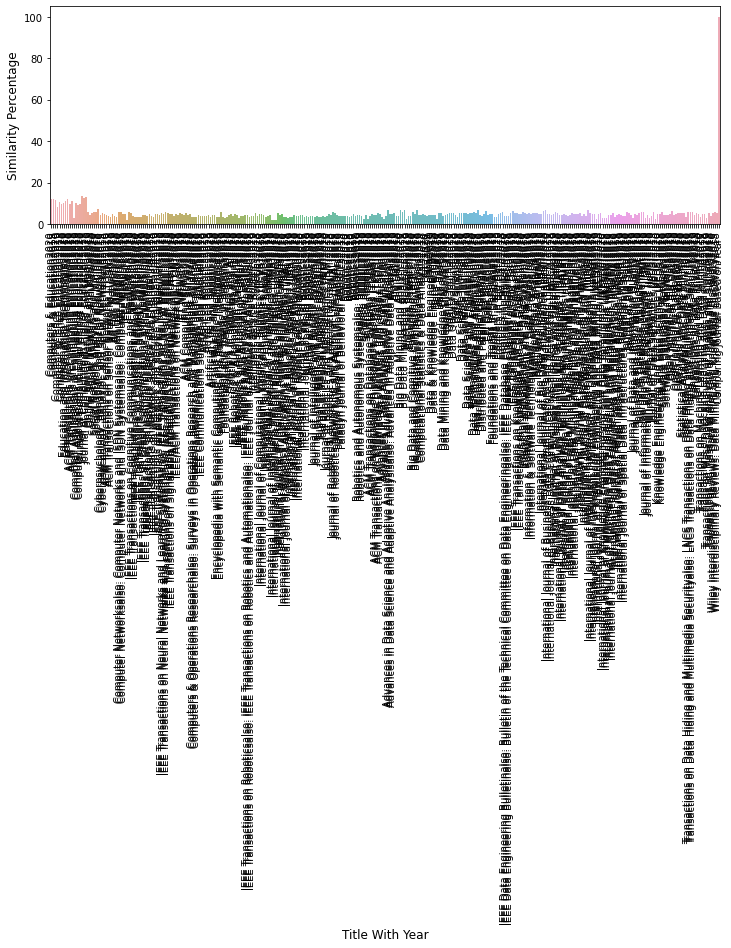

In [37]:
#draw a bar graph
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
sns.barplot(df['TitleYear'],  similarity[rowCount]*100, alpha=0.8)
plt.ylabel('Similarity Percentage', fontsize=12)
plt.xlabel('Title With Year', fontsize=12)
plt.xticks(rotation=90)
 
plt.show();


In [38]:
#DataFrame Journal
column_names = ["Title","Similarity","ImpactFactor","AcceptanceRate","Reviewtime","ObjectiveFunction"]#Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime

dataJournal = pd.DataFrame(columns = column_names)

#For loop
for ind in  range(0,22,1):
    #print(df['Title'][ind], df['Year'][ind]) 
    k=ind*3;    
    score2020= similarity[rowCount][k]*100
    score2019= similarity[rowCount][k+1]*100
    score2018= similarity[rowCount][k+2]*100
    ort=(score2020*5+score2019*3+score2018*1)/9
    objectiveFun=ort*30+df['ImpactFactor'][k]*5+(100/df['Reviewtime'][k])*5+df['AcceptanceRate'][k]*10
        
    dataJournal.loc[len(dataJournal.index)] = [df['Title'][ind*3],ort,df['ImpactFactor'][ind*3],df['AcceptanceRate'][ind*3],df['Reviewtime'][ind*3],objectiveFun]

In [39]:
#top 10
dataJournal.sort_values(by=['Similarity'], ascending=False).head(15)

Title  Similarity  \
5            Journal of Computing in Higher Education   13.012032   
0                               Computers & Education   12.073696   
2              Education and Information Technologies   10.749675   
4      Computer Applications in Engineering Education    9.810481   
3             ACM Transactions on Computing Education    9.229226   
1                          Computer Science Education    9.041999   
7                  Social Network Analysis and Mining    5.802782   
11  Computer Networksalso: Computer Networks and I...    5.563696   
6                    Online Social Networks and Media    5.150668   
18  IEEE Transactions on Neural Networks and Learn...    5.143851   
19  IEEE Transactions on Signal and Information Pr...    5.090696   
21                                       IET Networks    4.917879   
17  IEEE Transactions on Network and Service Manag...    4.786818   
8    Cyberpsychology  Behavior  and Social Networking    4.780713   
13  IEEE Transactions on Cognitive Communications ...    4.647079   

    ImpactFactor  AcceptanceRate Reviewtime  ObjectiveFunction  
5           0.66             0.2          8         458.160953  
0           3.63             0.2          4         507.360867  
2           1.65             0.2          8         395.240238  
4           0.33             0.2          8         360.464436  
3           0.99             0.2          8         346.326793  
1           0.80             0.2          8         339.759961  
7           2.97             0.2          8         253.433475  
11          7.26             0.2          8         267.710891  
6           2.15             0.2          8         229.770041  
18         16.17             0.2          8         299.665543  
19          5.78             0.2          8         246.120877  
21          1.49             0.2          8         219.486380  
17          6.43             0.2          8         240.254527  
8           0.20             0.2          8         208.921388  
13          4.46             0.2          8         226.212371

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


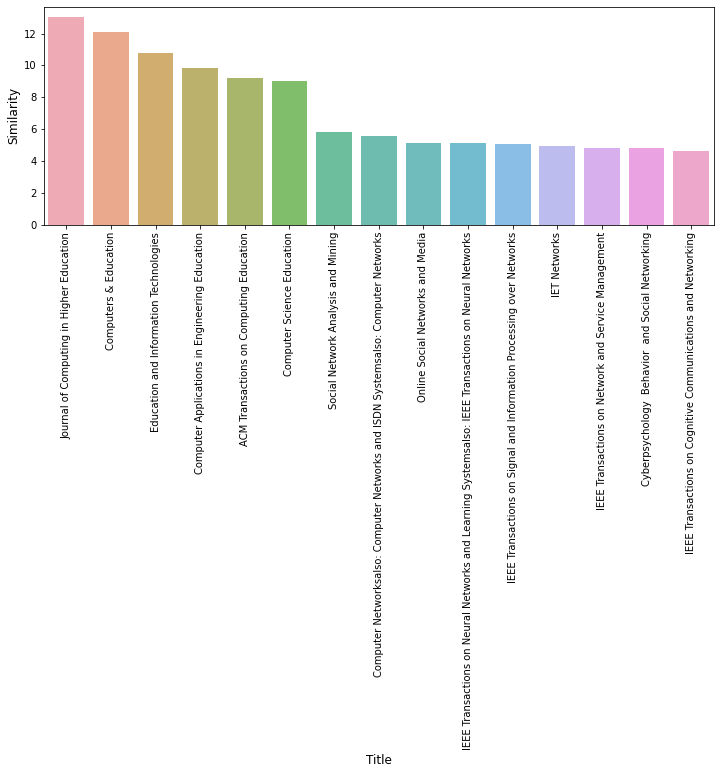

In [40]:
dt=dataJournal.sort_values(by=['Similarity'], ascending=False).head(15)
import seaborn as sns
import matplotlib.pyplot as plt
#cnt_pro = dt['Title'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['Title'], dt['Similarity'] , alpha=0.8)
plt.ylabel('Similarity', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();




In [41]:
dataJournal.sort_values(by=['ObjectiveFunction'], ascending=False,)

Title  Similarity  \
0                               Computers & Education   12.073696   
5            Journal of Computing in Higher Education   13.012032   
2              Education and Information Technologies   10.749675   
4      Computer Applications in Engineering Education    9.810481   
3             ACM Transactions on Computing Education    9.229226   
1                          Computer Science Education    9.041999   
18  IEEE Transactions on Neural Networks and Learn...    5.143851   
11  Computer Networksalso: Computer Networks and I...    5.563696   
7                  Social Network Analysis and Mining    5.802782   
19  IEEE Transactions on Signal and Information Pr...    5.090696   
20          IEEE/ACM Transactions on Networking (TON)    4.294076   
17  IEEE Transactions on Network and Service Manag...    4.786818   
12                                       IEEE Network    4.071946   
6                    Online Social Networks and Media    5.150668   
13  IEEE Transactions on Cognitive Communications ...    4.647079   
15  IEEE Transactions on Green Communications and ...    4.258006   
10                                    Ad Hoc Networks    4.331289   
16  IEEE Transactions on Network Science and Engin...    4.341483   
21                                       IET Networks    4.917879   
9          ACM Transactions on Sensor Networks (TOSN)    4.110539   
8    Cyberpsychology  Behavior  and Social Networking    4.780713   
14    IEEE Transactions on Control of Network Systems    3.361726   

    ImpactFactor  AcceptanceRate Reviewtime  ObjectiveFunction  
0           3.63             0.2          4         507.360867  
5           0.66             0.2          8         458.160953  
2           1.65             0.2          8         395.240238  
4           0.33             0.2          8         360.464436  
3           0.99             0.2          8         346.326793  
1           0.80             0.2          8         339.759961  
18         16.17             0.2          8         299.665543  
11          7.26             0.2          8         267.710891  
7           2.97             0.2          8         253.433475  
19          5.78             0.2          8         246.120877  
20         10.39             0.2          8         245.272276  
17          6.43             0.2          8         240.254527  
12         10.39             0.2          8         238.608391  
6           2.15             0.2          8         229.770041  
13          4.46             0.2          8         226.212371  
15          6.76             0.2          8         226.040182  
10          6.11             0.2          8         224.988665  
16          5.61             0.2          8         222.794488  
21          1.49             0.2          8         219.486380  
9           4.29             0.2          8         209.266163  
8           0.20             0.2          8         208.921388  
14          6.11             0.2          8         195.901782

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


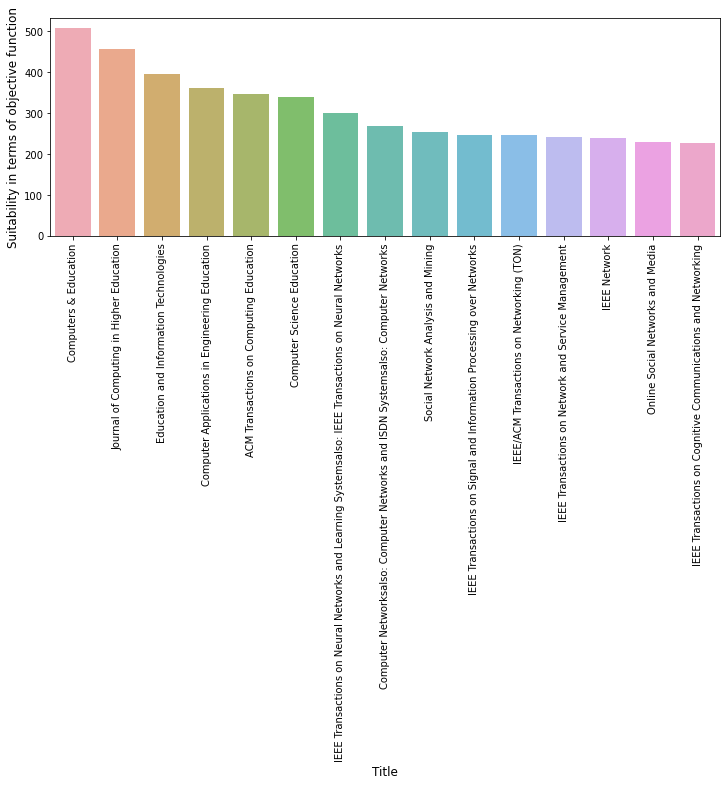

In [42]:
dt=dataJournal.sort_values(by=['ObjectiveFunction'], ascending=False).head(15)
import seaborn as sns
import matplotlib.pyplot as plt
#cnt_pro = dt['Title'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['Title'], dt['ObjectiveFunction'] , alpha=0.8)
plt.ylabel('Suitability in terms of objective function', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [43]:
import ipywidgets as widgets
import tensorflow as tf
print(tf.__version__)
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

2.3.0


IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [45]:
import ipywidgets as widgets

#from IPython.display import display

 #objectiveFun=ort*3+df['ImpactFactor'][ind*3]*3*3+(100/df['Reviewtime'][ind*3])*3*3+df['AcceptanceRate'][ind*3]*10*3
print("Please select the coefficients of the objective function to find suitable journal")
simil=widgets.IntSlider(
    min=1,
    max=50,
    step=5,
    description='Similarity:',
    value=30
)
impactF=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='ImpactFactor',
    value=5
)
accptRate=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Acceptance:',
    value=5
)
reviewTime=widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Review Time:',
    value=0
)
 #DataFrame Journal
column_names = ["Title","Similarity","ImpactFactor","AcceptanceRate","Reviewtime","ObjectiveFunction"]#Title,Content,Year,ImpactFactor,AcceptanceRate,Reviewtime
costumJ = pd.DataFrame(columns = column_names)

btn = widgets.Button(description='Calculate Again')
def Calculate(b):
    print("Starting to Calculate:...")
    #clear all data
   # costumJ.iloc[0:0]#df.drop(df.index, inplace=True)
    costumJ.drop(costumJ.index, inplace=True)
    #For loop
    for ind in  range(0,22,1):
    #print(df['Title'][ind], df['Year'][ind]) 
        k=ind*3;
    
        score2020= similarity[rowCount][k]*100
        score2019= similarity[rowCount][k+1]*100
        score2018= similarity[rowCount][k+2]*100
        ort=(score2020*5+score2019*3+score2018*1)/9
        objectiveFun=ort*simil.value+df['ImpactFactor'][k]*impactF.value+(100/df['Reviewtime'][k])*reviewTime.value+df['AcceptanceRate'][k]*accptRate.value
        costumJ.loc[len(costumJ.index)] = [df['Title'][k],ort,df['ImpactFactor'][k],df['AcceptanceRate'][k],df['Reviewtime'][k],objectiveFun]
       
    display(costumJ.sort_values(by=['ObjectiveFunction'], ascending=False))
    #print(costumJ)

btn.on_click(Calculate)    

 
display(simil)
display(impactF)
display(accptRate)
display(reviewTime)
display(btn)

Please select the coefficients of the objective function to find suitable journal


IntSlider(value=30, description='Similarity:', max=50, min=1, step=5)

IntSlider(value=5, description='ImpactFactor', max=10)

IntSlider(value=5, description='Acceptance:', max=10)

IntSlider(value=0, description='Review Time:', max=10)

Button(description='Calculate Again', style=ButtonStyle())

Starting to Calculate:...


Title  Similarity  \
5            Journal of Computing in Higher Education   13.012032   
0                               Computers & Education   12.073696   
2              Education and Information Technologies   10.749675   
4      Computer Applications in Engineering Education    9.810481   
3             ACM Transactions on Computing Education    9.229226   
1                          Computer Science Education    9.041999   
18  IEEE Transactions on Neural Networks and Learn...    5.143851   
11  Computer Networksalso: Computer Networks and I...    5.563696   
7                  Social Network Analysis and Mining    5.802782   
19  IEEE Transactions on Signal and Information Pr...    5.090696   
20          IEEE/ACM Transactions on Networking (TON)    4.294076   
17  IEEE Transactions on Network and Service Manag...    4.786818   
12                                       IEEE Network    4.071946   
6                    Online Social Networks and Media    5.150668   
13  IEEE Transactions on Cognitive Communications ...    4.647079   
15  IEEE Transactions on Green Communications and ...    4.258006   
10                                    Ad Hoc Networks    4.331289   
16  IEEE Transactions on Network Science and Engin...    4.341483   
21                                       IET Networks    4.917879   
9          ACM Transactions on Sensor Networks (TOSN)    4.110539   
8    Cyberpsychology  Behavior  and Social Networking    4.780713   
14    IEEE Transactions on Control of Network Systems    3.361726   

    ImpactFactor  AcceptanceRate Reviewtime  ObjectiveFunction  
5           0.66             0.2          8         394.660953  
0           3.63             0.2          4         381.360867  
2           1.65             0.2          8         331.740238  
4           0.33             0.2          8         296.964436  
3           0.99             0.2          8         282.826793  
1           0.80             0.2          8         276.259961  
18         16.17             0.2          8         236.165543  
11          7.26             0.2          8         204.210891  
7           2.97             0.2          8         189.933475  
19          5.78             0.2          8         182.620877  
20         10.39             0.2          8         181.772276  
17          6.43             0.2          8         176.754527  
12         10.39             0.2          8         175.108391  
6           2.15             0.2          8         166.270041  
13          4.46             0.2          8         162.712371  
15          6.76             0.2          8         162.540182  
10          6.11             0.2          8         161.488665  
16          5.61             0.2          8         159.294488  
21          1.49             0.2          8         155.986380  
9           4.29             0.2          8         145.766163  
8           0.20             0.2          8         145.421388  
14          6.11             0.2          8         132.401782

Starting to Calculate:...


Title  Similarity  \
5            Journal of Computing in Higher Education   13.012032   
0                               Computers & Education   12.073696   
2              Education and Information Technologies   10.749675   
4      Computer Applications in Engineering Education    9.810481   
3             ACM Transactions on Computing Education    9.229226   
1                          Computer Science Education    9.041999   
18  IEEE Transactions on Neural Networks and Learn...    5.143851   
11  Computer Networksalso: Computer Networks and I...    5.563696   
7                  Social Network Analysis and Mining    5.802782   
19  IEEE Transactions on Signal and Information Pr...    5.090696   
20          IEEE/ACM Transactions on Networking (TON)    4.294076   
17  IEEE Transactions on Network and Service Manag...    4.786818   
12                                       IEEE Network    4.071946   
6                    Online Social Networks and Media    5.150668   
13  IEEE Transactions on Cognitive Communications ...    4.647079   
15  IEEE Transactions on Green Communications and ...    4.258006   
10                                    Ad Hoc Networks    4.331289   
16  IEEE Transactions on Network Science and Engin...    4.341483   
21                                       IET Networks    4.917879   
9          ACM Transactions on Sensor Networks (TOSN)    4.110539   
8    Cyberpsychology  Behavior  and Social Networking    4.780713   
14    IEEE Transactions on Control of Network Systems    3.361726   

    ImpactFactor  AcceptanceRate Reviewtime  ObjectiveFunction  
5           0.66             0.2          8         394.660953  
0           3.63             0.2          4         381.360867  
2           1.65             0.2          8         331.740238  
4           0.33             0.2          8         296.964436  
3           0.99             0.2          8         282.826793  
1           0.80             0.2          8         276.259961  
18         16.17             0.2          8         236.165543  
11          7.26             0.2          8         204.210891  
7           2.97             0.2          8         189.933475  
19          5.78             0.2          8         182.620877  
20         10.39             0.2          8         181.772276  
17          6.43             0.2          8         176.754527  
12         10.39             0.2          8         175.108391  
6           2.15             0.2          8         166.270041  
13          4.46             0.2          8         162.712371  
15          6.76             0.2          8         162.540182  
10          6.11             0.2          8         161.488665  
16          5.61             0.2          8         159.294488  
21          1.49             0.2          8         155.986380  
9           4.29             0.2          8         145.766163  
8           0.20             0.2          8         145.421388  
14          6.11             0.2          8         132.401782

C:\Users\Nemo\anaconda3\envs\tens\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


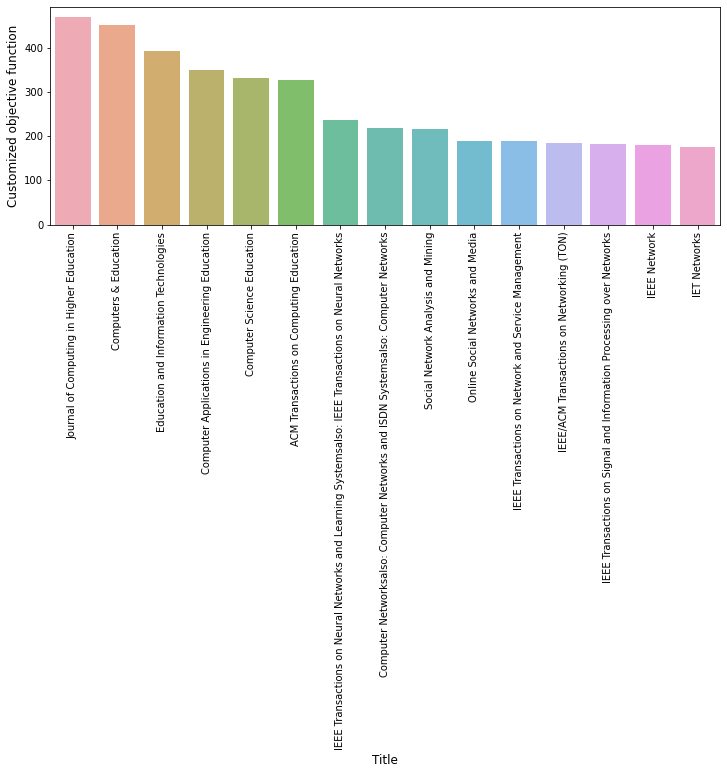

In [47]:
#lets find sutable journal based on user pereferences
dt=costumJ.sort_values(by=['ObjectiveFunction'], ascending=False).head(15)
import seaborn as sns
import matplotlib.pyplot as plt
#cnt_pro = dt['Title'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(dt['Title'], dt['ObjectiveFunction'] , alpha=0.8)
plt.ylabel('Customized objective function', fontsize=12)
plt.xlabel('Title', fontsize=12)
plt.xticks(rotation=90)
plt.show();